# Projet CO2 à finir maison 

## Avancées faites sur site

In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt 


# Importation et nettoyage du jeu de données issues de RTE

La première étape est d'importer le jeu de données sur la production d'électricité française. Les données sont issue de RTE pour la période s'étalant de Janvier 2021 à janvier 2022. Ces données ont été vérifiée et consolidées plusieurs fois par les organismes compétents et sont donc fiables. 

In [3]:
data = pd.read_csv("../Data/eco2mix-national-cons-def.csv", sep=";", header=0)
data

,Périmètre,Nature,Date,Heure,Date et Heure,Consommation (MW),Prévision J-1 (MW),Prévision J (MW),Fioul (MW),Charbon (MW),...,Gaz - TAC (MW),Gaz - Cogénération (MW),Gaz - CCG (MW),Gaz - Autres (MW),Hydraulique - Fil de l'eau + éclusée (MW),Hydraulique - Lacs (MW),Hydraulique - STEP turbinage (MW),Bioénergies - Déchets (MW),Bioénergies - Biomasse (MW),Bioénergies - Biogaz (MW)
0,France,Données consolidées,2021-08-07,18:45,2021-08-07T18:45:00+02:00,NaN,39350,39550,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,France,Données consolidées,2021-08-07,21:45,2021-08-07T21:45:00+02:00,NaN,38000,38200,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,France,Données consolidées,2021-08-07,22:15,2021-08-07T22:15:00+02:00,NaN,38900,39100,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,France,Données consolidées,2021-08-07,23:45,2021-08-07T23:45:00+02:00,NaN,40300,40400,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,France,Données consolidées,2021-08-08,01:30,2021-08-08T01:30:00+02:00,34655.0,35800,35200,60.0,8.0,...,0.0,276.0,240.0,58.0,5072.0,856.0,638.0,481.0,296.0,332.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,France,Données consolidées,2021-01-10,15:45,2021-01-10T15:45:00+01:00,NaN,68850,69100,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35036,France,Données consolidées,2021-01-11,01:30,2021-01-11T01:30:00+01:00,73385.0,72500,73600,97.0,1528.0,...,4.0,2915.0,4947.0,94.0,3520.0,2280.0,260.0,502.0,286.0,330.0
35037,France,Données consolidées,2021-01-11,04:45,2021-01-11T04:45:00+01:00,NaN,68350,70000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35038,France,Données consolidées,2021-01-11,08:00,2021-01-11T08:00:00+01:00,86759.0,85800,88100,120.0,2289.0,...,1.0,3118.0,5570.0,92.0,5236.0,5889.0,2664.0,493.0,278.0,323.0


Une fois ce jeu de données importé, il est possible de visualiser les données contenues. On remarque d'ailleurs qu'il existe plusieurs lignes de données où des données sont manquantes car l'index temporel utilisé est trop rafiné. De plus, certaines colonnes ne seront pas utilisées pour la suite de l'étude. Par exemple, les colonnes périmètre et nature des données ne seront plus utiles par la suite, de la même manière que les colonnes Date et Heure font doublons avec la colonne "Date et Heure" qui regroupe les même données. On peut donc supprimer ces colonnes afin d'alléger notre tableau. 

In [4]:
data.drop(columns=["Périmètre","Nature","Date","Heure"], inplace=True)

Par la suite, on utilise la colonne "Date et Heure" pour indexer notre tableau afin de s'assurer d'avoir des données liées à une temporalité. De cette manière on peut trier et analyser nos données de manière plus aisées. De plus, dans le cadre de ce Notebook j'utilise une librairie Python appelée "Pandas" qui a été spécialement conçue pour travailler avec de telles données temporelle, et pour l'utiliser à son plein potentiel, il faut désigner l'index comme étant une date et une heure. 

In [5]:
data.set_index("Date et Heure", inplace=True)
data.index = pd.to_datetime(data.index, utc=True)
data.index = data.index.tz_convert("Europe/Paris")


Une fois la dataframe (= le tableau de données) bien reformée, on va pouvoir supprimer les lignes inutiles. Par lignes inutiles j'entends ici les lignes comprenant des "NaN" comme dans le premier tableau. En effet, ces lignes faisant état d'un manque de données, il est inutile de les conserver pour la suite de l'étude. De plus, afin de s'assurer qu'il ne manque pas d'information après suppression de ces lignes, on peut vérifier combien de lignes il nous reste après suppression. 

In [6]:
data.dropna(inplace=True)
data.shape

(17520, 32)

On remarque que seulement la moitié des lignes a été conservé. Cela renforce l'idée première selon laquelle l'index temporel était trop raffiné pour les données. En effet, en immaginant que la base de donnée était mise à jour toutes les 15 minutes, mais que les données réelles n'étaient communiquées que toutes les 30 minutes, il est évident qu'une ligne sur deux n'allait pas contenir de données. 

Sachant cela, on peut maintenant trier notre dataframe selon la date afin de s'assurer du bon ordre chronologique.

In [7]:
data.sort_index(inplace=True) 

## Constitution des différentes bases (Production globale, ENR, Consommation, Exportation)

Afin de s'assurer une bonne étude, il faut maintenant séparer nos données en différents jeux de données plus petits. Je vais donc séparer les données de la base principale en plusieurs sous bases de données qui vont contenir chacune des données liées à un champ spécifique de la production d'énergie française, à savoir :
* Une base de donneés comprenant les données de production d'énergie totale en France, peu importe la source de production
* Une base comprenant les données concernant les énergies renouvelables (Solaire, éolien, Hydraulique, Bioénergies)
* Une base comprenant les données concernant les énergies dites "Vertes", ou "Sustainable" (Nucléaire, gaz + toutes celles de la base précédente) (*Note : cette base a été constituée selon la nouvelle taxonomie verte Européenne qui inclue le nucléaire et le gaz sous certaines conditions strictes depuis Juillet 2022)
* Une base comprenant les sources d'énergie fossile (Fioul, Charbon, Gaz)
* Une base comprenant les exportations d'énergie aux pays voisins de l'UE

In [8]:
data_prod = data[['Fioul (MW)','Charbon (MW)','Gaz (MW)', 'Nucléaire (MW)','Eolien (MW)','Solaire (MW)','Hydraulique (MW)','Bioénergies (MW)']]
data_enr = data[['Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)', 'Bioénergies (MW)']]
data_vert = data[['Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)', 'Bioénergies (MW)','Nucléaire (MW)', 'Gaz (MW)']]
data_fossile = data[['Charbon (MW)','Gaz (MW)', 'Fioul (MW)']]
data_export = data[['Ech. comm. Allemagne-Belgique (MW)', 'Ech. comm. Angleterre (MW)', 'Ech. comm. Espagne (MW)', 'Ech. comm. Italie (MW)',
                    'Ech. comm. Suisse (MW)','Ech. physiques (MW)']]

In [9]:
data_export

,Ech. comm. Allemagne-Belgique (MW),Ech. comm. Angleterre (MW),Ech. comm. Espagne (MW),Ech. comm. Italie (MW),Ech. comm. Suisse (MW),Ech. physiques (MW)
Date et Heure,,,,,,
2021-01-01 00:00:00+01:00,3022.0,-2000.0,1682.0,502.0,-1960.0,1429.0
2021-01-01 00:30:00+01:00,3172.0,-2000.0,1682.0,502.0,-1960.0,881.0
2021-01-01 01:00:00+01:00,2294.0,-2000.0,2463.0,611.0,-1804.0,1200.0
2021-01-01 01:30:00+01:00,2544.0,-2000.0,2463.0,611.0,-1804.0,1825.0
2021-01-01 02:00:00+01:00,3206.0,-2000.0,3200.0,834.0,-2002.0,2097.0
...,...,...,...,...,...,...
2021-12-31 21:30:00+01:00,1822.0,629.0,-3496.0,-2934.0,-2720.0,-6508.0
2021-12-31 22:00:00+01:00,3719.0,232.0,-2139.0,-2868.0,-3163.0,-6117.0
2021-12-31 22:30:00+01:00,3719.0,232.0,-2139.0,-2868.0,-3163.0,-4254.0


# Observation des dataframes obtenues

Afin d'observer les tendances générales des données obtenues, on effectue un graphique reprenant la valeur moyenne hebdomadaire de chaque donnée. On pourra ainsi apprecier de manière globale les variation de production. 

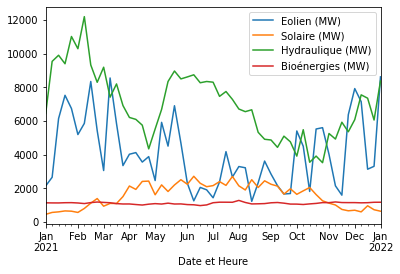

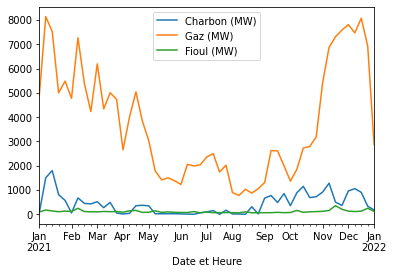

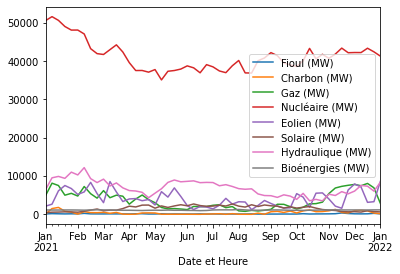

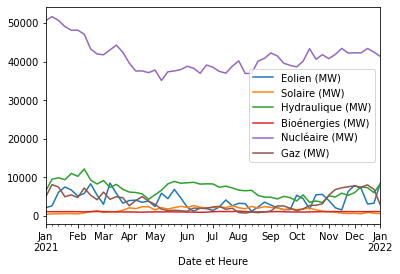

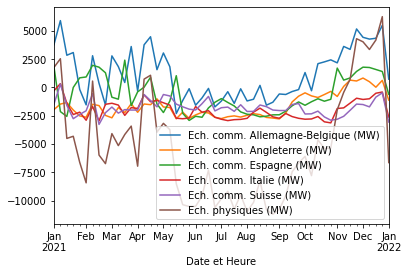

In [10]:
dataframes = [data_enr, data_fossile, data_prod, data_vert, data_export]
for df in dataframes :
    df.resample("W").mean().plot()

## Analyses des graphiques

### La production d'énergie globale 

Afin d'analyser la production d'énergie globale ainsi que les différences entre les sources d'énergie électrique française on utilise un graphique en aires, qui permet de mieux apprécier la part globale de chaque source d'énergie dans le total de production.

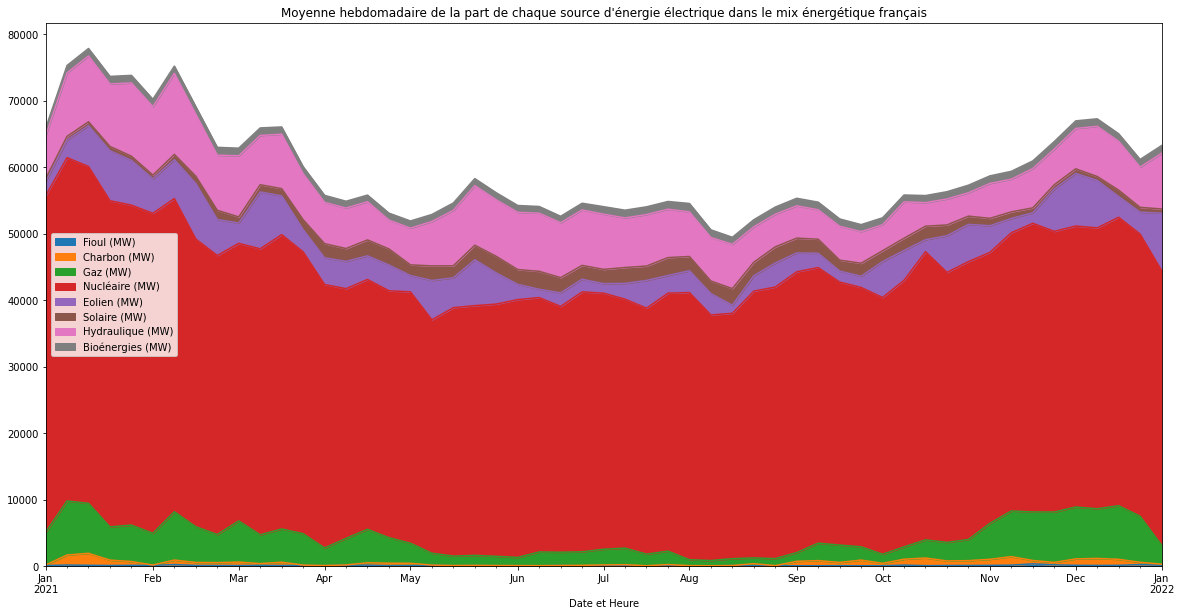

In [11]:
fig_prod_area = data_prod.resample('W').mean().plot.area(figsize=(20,10), title="Moyenne hebdomadaire de la part de chaque source d'énergie électrique"
+" dans le mix énergétique français").get_figure()

La première chose qui saute rapidement aux yeux est la part importante du nucléaire dans le mix énergétique de production d'électricité. On remarque également une belle part réservée à la production hydraulique et également à l'éolien. Ces différentes part semblent relativement constantes tout au long de l'année 2021. 

On remarquera également la présence d'une belle part de production gazière, surtout durant les mois d'hiver et de début printemps. 

Pour le reste, on retiendra que la part du solaire augmente à partir de mi printemps jusqu'à mi automne. Rien d'étonnant puisque l'ensoleillement diminue en  dehors de ces périodes. 

Pour finir on remarquera une part négligeable dédiée au Charbon et au Fioul. 

En rentrant un peu plus en profondeur dans l'analyse on remarque ce qui semble être une corrélation entre la production gazière et la production solaire. Il serait tentant d'affirmer dès maintenant que les centrales à gaz servent en majorité à compenser le manque de solaire durant l'hiver, et également en cas de pic de demande sur le réseau afin de compenser le caractère non pilotable des centrales photovoltaïques. Cependant il est encore trop tôt pour affirmer une telle chose (ou même l'infirmer). En l'état nous ne pouvons considérer qu'il n'existe qu'une simple corrélation apparente entre ces deux sources d'énergie. 

Etudions maintenant l'évolution directe des valeurs moyennes au cours de l'année de ces sources d'énergie.

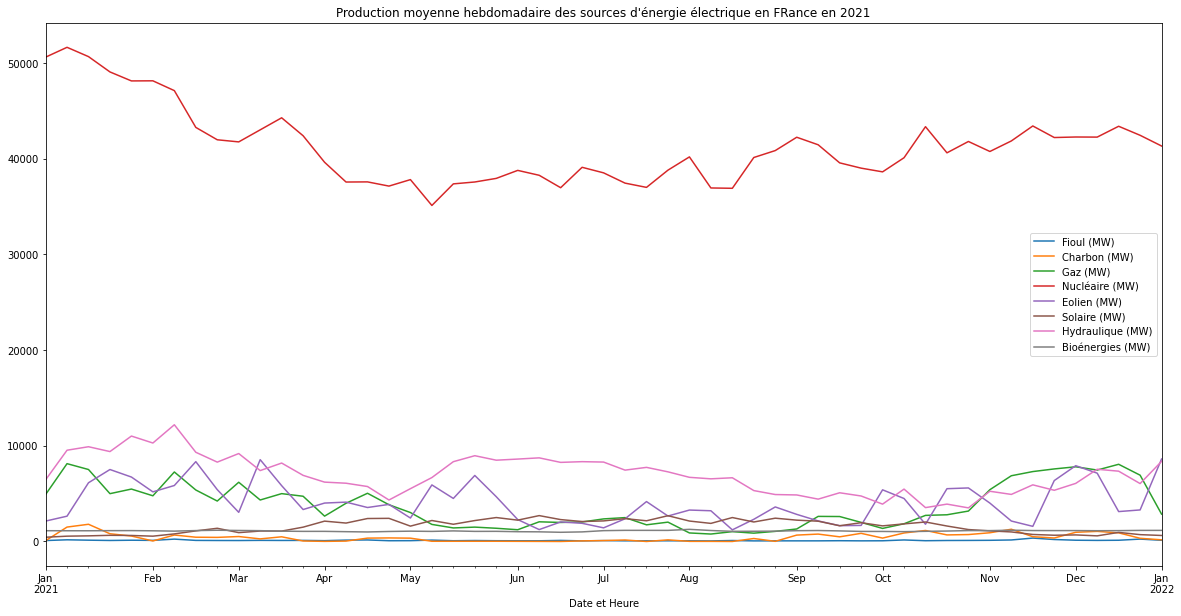

In [12]:
fig_prod = data_prod.resample('W').mean().plot(figsize = (20,10), title="Production moyenne hebdomadaire des sources d'énergie électrique en FRance en 2021")

Grâce à ce graphique nous pouvons avoir une idée plus précise de la production d'énergie par source. On remarque la même tendance que précédemment, à savoir que les sources d'électricité les plus importantes sont le nucléaire (de loin la première), l'hydraulique en second et enfin l'éolien. 

On remarque également que la production éolienne oscille au gré des semaines, et qu'elle passe par un "plateaux" minimum aux alentours de l'été notamment. 

Notons aussi que la production liée au gaz subit une forte augmentation durant les mois d'hiver, passant même devant la production hydraulique durant Novembre et Décembre 2021 ! 

Concernant les autres modes de production l'échelle n'est malheureusement pas adaptée. Qu'à cela ne tienne, nous allons les analyser séparément. Nous pouvons néanmoins retenir que la production absolue de ces méthodes est négligeable face aux quatre autres modes de production principaux. 

<AxesSubplot:title={'center':"Production d'électricité dûe aux modes de production les moins prédominants en France en 2021"}, xlabel='Date et Heure'>

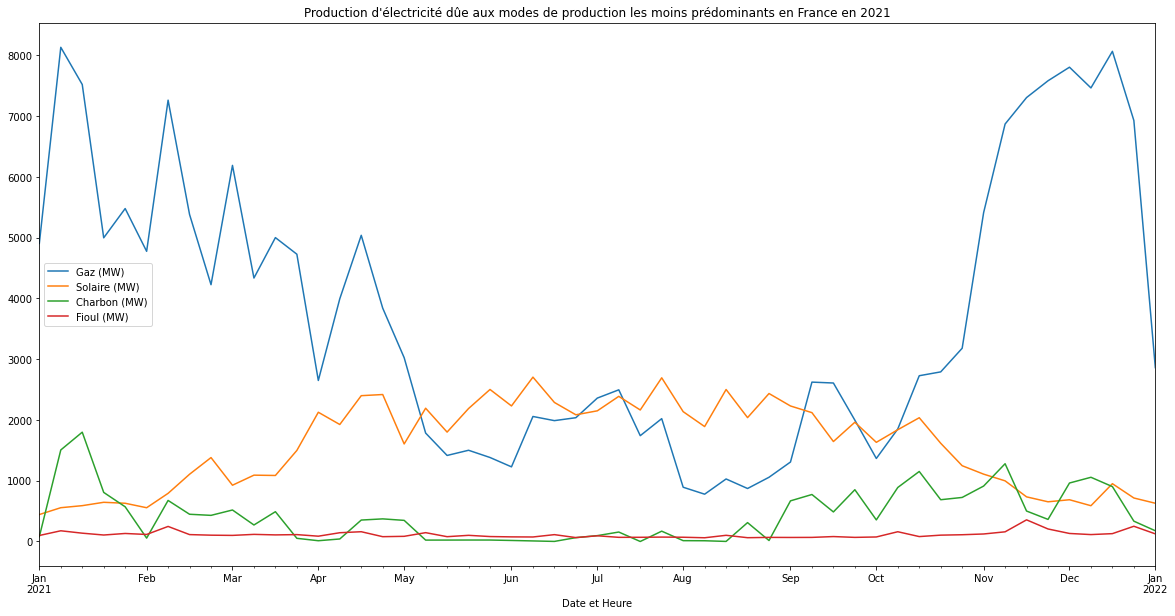

In [13]:
data_prod_faible = data_prod[['Gaz (MW)', 'Solaire (MW)', 'Charbon (MW)', 'Fioul (MW)']]
data_prod_faible.resample('W').mean().plot(figsize=(20,10), title="Production d'électricité dûe aux modes de production les moins prédominants en France en 2021")

Ce graphique est bien plus utile afin d'étudier les différentes variations de ces modes de production d'électricité. En effet on remarque assez bien sur ces graphique que la production du Fioul est très négligeable de manière générale, et que celle du charbon l'est tout autant en dehors des périodes hivernales. 

Ajoutons à cela que nous pouvons également mieux observer la corrélation qui semble exister entre production gazière et production solaire, comme nous en avions émis l'hypothèse plus haut. On remarque bien ici une augmentation de la production solaire durant les mois printaniers et éstivaux, ainsi qu'une diminution dans le même temps de la production gazière. Nous pouvons donc apporter un peu plus de crédit à notre hypothèse de base. 

Cependant, on remarque que les valeurs absolues de production ne se compense pas du tout. En effet, là ou le gaz se situe à une moyenne de 6000 MW produit sur les premiers mois de l'année, le solaire stagne à à peine 500MW, et à l'inverse en été le solaire ne grimpe "que" jusqu'à 3000MW environ alors que le gaz chute à moins de 2000MW en moyenne. Cela représente donc un gap global entre les deux énergies d'environ 1000MW, ce qui reste quand même relativement élevé. 

Plusieurs explications demeurent possibles pour expliquer ces différence. Tout d'abord une possible demande en énergie plus importante en hiver qu'en été : en effet en hiver nous avons tendance à plus chauffer, à plus manger des aliments chauds, à éclairer également plus longtemps compte tenu de la durée réduite de la journée. Tous ces élements peuvent expliquer une production globale plus importante. Peut également s'ajouter à cela que le gaz puisse compenser dans le même temps un manque de production des autres sources d'énergie. 

Il est également important de rappeler que le gaz possède un énorme avantage sur le solaire et l'éolien : il est entièrement pilotable. En cela nous entendons qu'il est possible d'augmenter ou diminuer rapidement la production, là où ce n'est pas possible de le faire avec l'éolien ou le solaire (je n'ai personnellement jamais vu personne commander aux vents ni aux nuages pour qu'il y ait plus de soleil). 

Autre donnée intéressante, les centrales à charbon fonctionne également bien plus durant ces périodes hivernales qu'en été.

Toutes ces données combinées tendent donc vers l'hypothèse que la demande en électricité est bien plus forte en hiver, et bien plus dépendante de sources pilotables à la demande.

Nous pouvons vérifier cela de manière rapide grâce aux données RTE

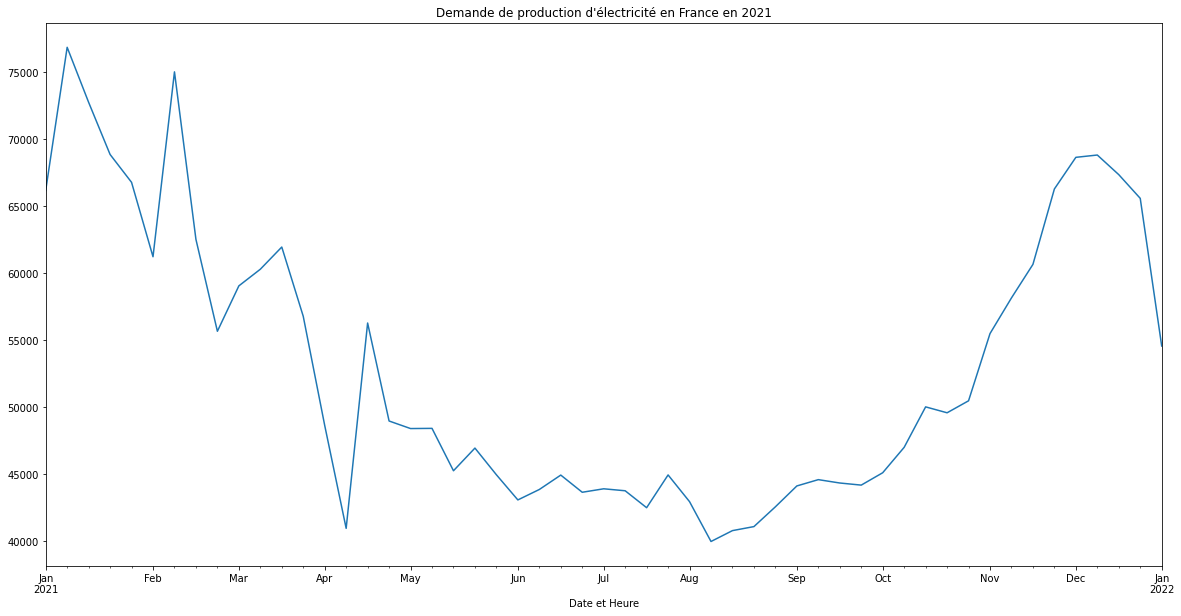

In [14]:
data_demande = data['Prévision J (MW)'].resample('W').mean().plot(figsize=(20,10), title="Demande de production d'électricité en France en 2021")

Notre précédente hypothèse semble donc juste ! En effet on observe une très nette augmentation de la production globale durant les périodes hivernales que lors des périodes estivales. En combinant ces résultats et les résultats précédents nous pouvons en tirer plusieurs choses que je vais rappeler :

* Le nucléaire est la source d'énergie privilégiée en France
* Le solaire et l'éolien semblent être compensés en cas de forte demande par les centrales à gaz et à charbon, spécialement lors des périodes hivernales
* Les centrales à Fioul représentent une part négligeable de la production française globale (mais elle existe)
* Les centrales à charbons ne semblent être utilisées qu'en cas de dernier recours, lorsque les autres modes de production ne peuvent répondre à la demande. 
* Le solaire perd de sa capacité de production durant les périodes hivernales et doit être compensé
* Les sources d'énergies renouvelables (solaire et éolien) ne sont pas pilotables et représentent donc un certain risque en cas de pic de demande et de consommation, et doivent donc être compensées par des sources fossiles pilotables (gaz et charbon en majeure partie)


# Zoom sur les énergies renouvelables (Solaire, éolien et hydraulique en particulier)

Maintenant que nous avons fait un tour d'horizon global des sources d'énergie électrique en France sur l'année 2021, nous pouvons observer plus dans le détail les sources d'énergie renouvelables, à savoir le solaire, l'éolien et l'hydraulique. 


<AxesSubplot:title={'center':"Production d'électricité via les sources renouvelable en moyenne hebdomadaire en France en 2021"}, xlabel='Date et Heure'>

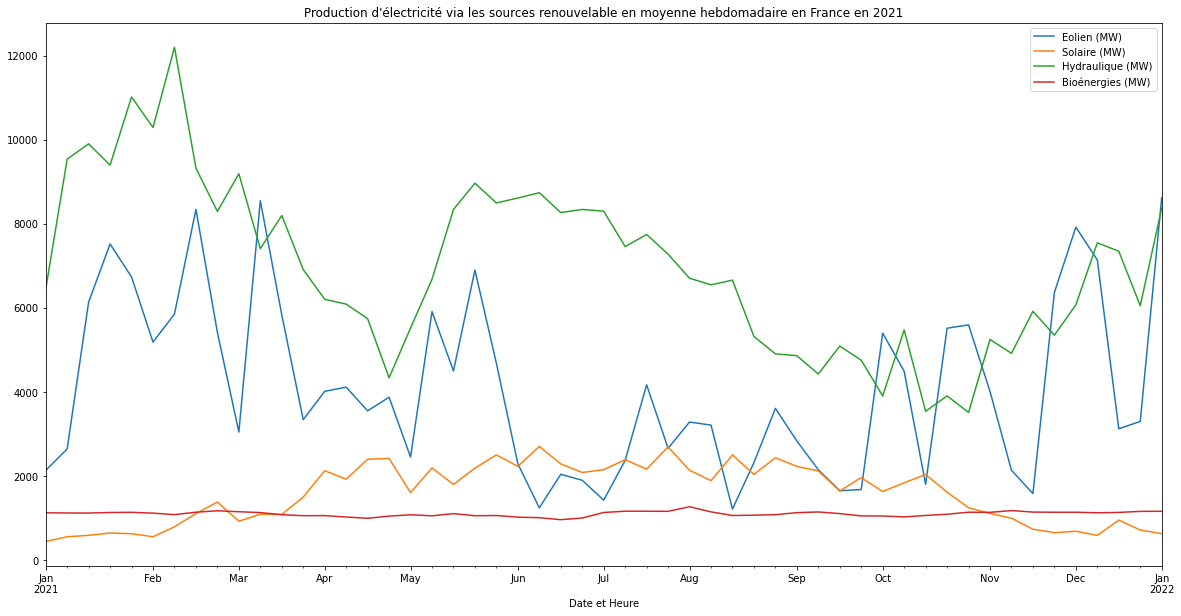

In [15]:
data_enr.resample('W').mean().plot(figsize=(20,10), title="Production d'électricité via les sources renouvelable en moyenne hebdomadaire en France en 2021")

Plusieurs choses intéressantes ressortent de ce graphique. 

Premièrement on observe une grande oscillation dans la production d'énergie éolienne au cours des semaines. Cela souligne d'autant plus la non pilotabilité de cette source d'énergie. En effet, on remarque beaucoup moins ces oscillations sur la production nucléaire par exemple. De plus, on remarque également une chute de production hydraulique à partir de Mars, qui correspond peu ou prou avec la montée de la production solaire. Notons que dans ce cadre la production d'énergie hydraulique via les barrages hydrauélectriques notamment est pilotable. Cette baisse de production est notamment liée à la baisse de la demande globale. La remontée qui suit est dûe aux compensation faites aux réacteurs nucléaires à l'arrêt durant les mois d'été à cause des fortes chaleurs, ainsi qu'à la baisse de régime de l'éolien durant cette même période. Qu'il est pratique d'avoir une source pilotable à la demande pour pallier ces manques de production de certaines sources ! 

Secondement, bien que la production d'énergie photovolaïque soit bien non pilotable, la valeur moyenne de la production hebdomadaire varie peu. En effet, sur cette source d'énergie, c'est plutôt la variation journalière qu'il est interressant d'étudier, afin de voir l'impact de la variation d'ensoleillement et de la nuit sur les produtions. Etudions les variations journalières du mois de juillet par exemple.

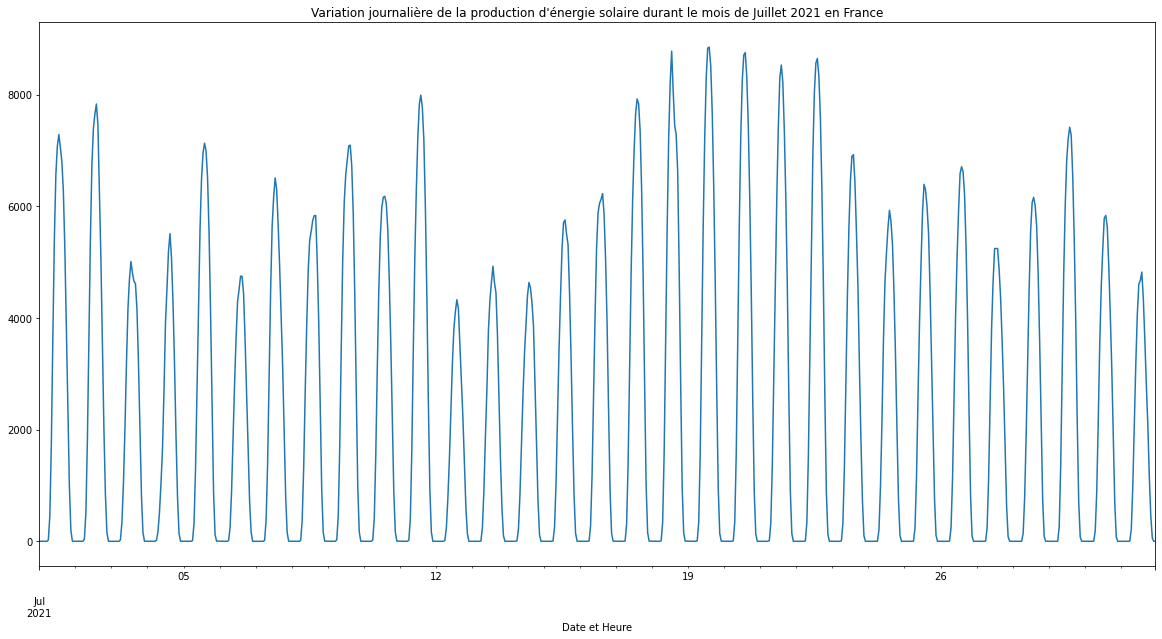

In [16]:
data_juillet_solaire = data_enr['Solaire (MW)'].loc[data_enr.index.month == 7].resample('H').mean().plot(figsize=(20,10), title="Variation journalière de la production d'énergie solaire durant le mois de Juillet 2021 en France")

La différence de production est très notable ! Comme nous pouvions nous y attendre, la nuit les panneaux solaires ne produisent rien ! Il faut donc évidemment compenser cela par une autre source d'énergie pilotable afin de pouvoir continuer à s'éclairer chez soi et d'utiliser l'électricité. 

Maintenant que nous avons pointé du doigt une des grandes limitations de l'utilisation de l'énergie solaire, analysons de plus prêt les variations journalières de production éolienne. 

<AxesSubplot:title={'center':"Production journalière d'électricité de source éolienne en France en Juillet 2021"}, xlabel='Date et Heure'>

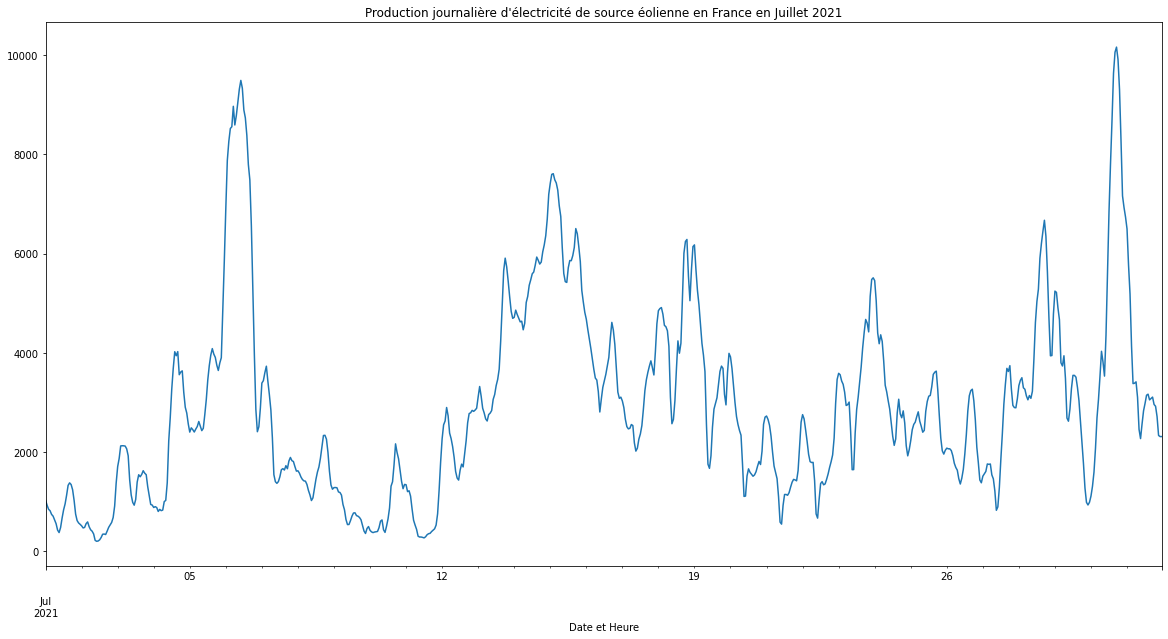

In [17]:
data_enr['Eolien (MW)'].loc[data_enr.index.month == 7].resample('H').mean().plot(figsize=(20,10), title="Production journalière d'électricité de source éolienne en France en Juillet 2021")

Grâce au graphique précédent on remarque bien que l'énergie éolienne ne souffre pas de l'écueil du solaire, à savoir une production nulle sur certains moments de la journée. En revanche on peut remarquer une grande disparité de distribution entre les différents pics de production, pouvant atteindre près de 10000 MW, et les points les plus faibles (~1000 MW). Nous observons en effet un facteur de presque 10 entre les deux zones de production, ce qui montre l'extrême sensibilité de la source éolienne aux aléas climatiques. 

Grâce aux deux derniers graphiques nous avons ainsi pu voir que les principales énergies renouvelables que le gouvernement veut à l'heure actuelle ameliorer possèdent de grosses limitations liées au caractère non pilotable de ces sources d'énergie. 

Mais, afin d'être complètement exhaustifs nous devons également analyser la production horaire des sources d'énergies dites pilotables, notamment celle du nucléaire, puisqu'il s'agit de la source que beaucoup voient comme notre seule porte de sortie de cette crise énergétique et climatique. 


<AxesSubplot:title={'center':"production horaire d'électricité nucléaire au cours du mois de juillet en France en 2021"}, xlabel='Date et Heure'>

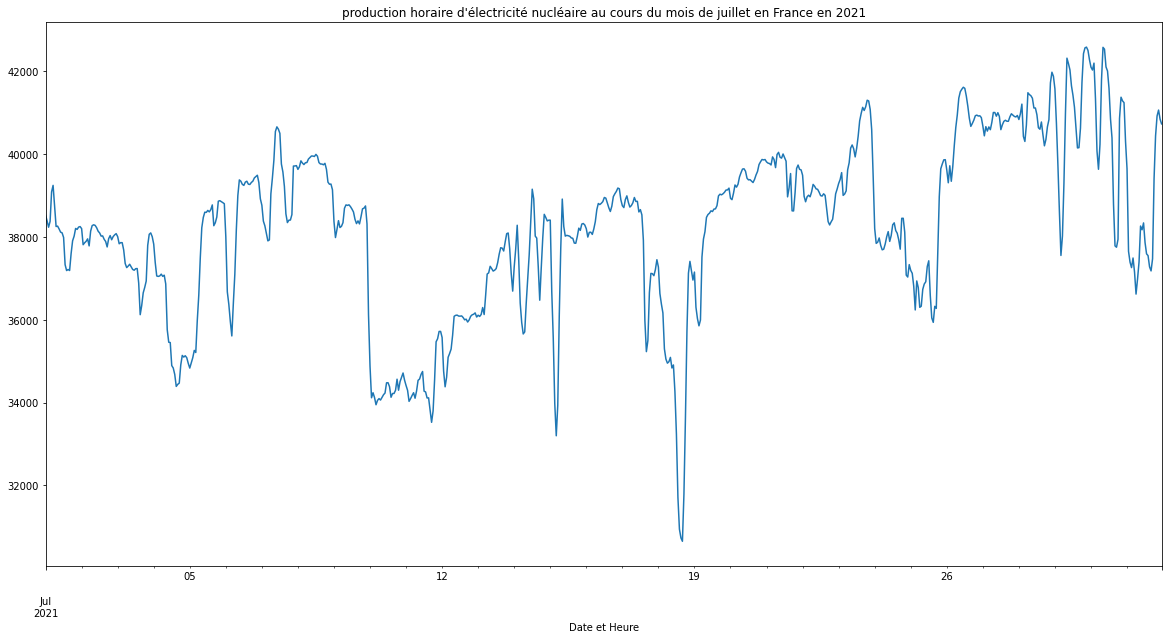

In [18]:
data_prod['Nucléaire (MW)'].loc[data_prod.index.month == 7].resample('H').mean().plot(figsize=(20,10), title="production horaire d'électricité nucléaire au cours"
+ " du mois de juillet en France en 2021")

En observant ce dernier graphe quelque chose saute aux yeux : qu'elle disparité de production entre plusieurs jours ! Pourtant le nucléaire est sensé être une énergie pilotable non ? 

Plusieurs explications à cela :
* Tout d'abord nous observons le mois de Juillet 2021 qui a été particulièrement chaud. Or, quand on parle de réacteur nucléaire, on entends également refroidissement. Et en cas de forte chaleur, la température globale des rivières augmente, ce qui ne leur permet pas de remplir leur fonction de refroidissement correctement. A partir de là, le gestionnaire français des centrales à l'obligation de fermer les réacteurs concernés afin de ne pas faire courir un risque de sécurité trop important aux centrales. Dans ce cadre, la production diminue considérablement en fonction du nombre de réacteurs fermés. 

C'est à cause de cet effet que, lors de l'été 2022, la production du parc solaire a dépassé celle du parc éolien pendant une semaine entre 10h et 16h30. en effet, 26 réacteurs étaient alors fermé à ce moment là, et l'ensoleillement était tel que la puissance convertie par le parc photovoltaïque était exceptionnelle. 

Par ces deux effets combinés on se rends bien compte des conditions environnementales hasardeuses nécessaires pour que le parc solaire produise autant voire plus d'électricité que le parc nucléaire. Combinant cet effet de hasard climatique avec la non pilotabilité intrinsèque de l'énergie solaire, on se rends bien compte qu'un parc entièrement solaire n'est pas une solution acceptable en l'état aujourd'hui, en tout cas pas tant que l'on a pas développer une solution de stockage suffisamment performante pour stocker l'énergie produite et la redistribuer à la demande. 

Bien que des pistes soient actuellement à l'étude, nous ne pouvons espérer de telles solutions de stockages avant plusieurs années en test, et à minima une dizaine d'années avant une mise en production à l'échelle industrielle. 

* Ensuite, nous pouvons également observer des fluctuations assez importantes dans la production journalière. Cet effet peut être mis en regard de la demande en énergie journalière afin d'essayer de trouver une corrélation. 


<AxesSubplot:title={'center':'Moyenne horaire de la demande en électricité en France au mois de Juillet 2021'}, xlabel='Date et Heure'>

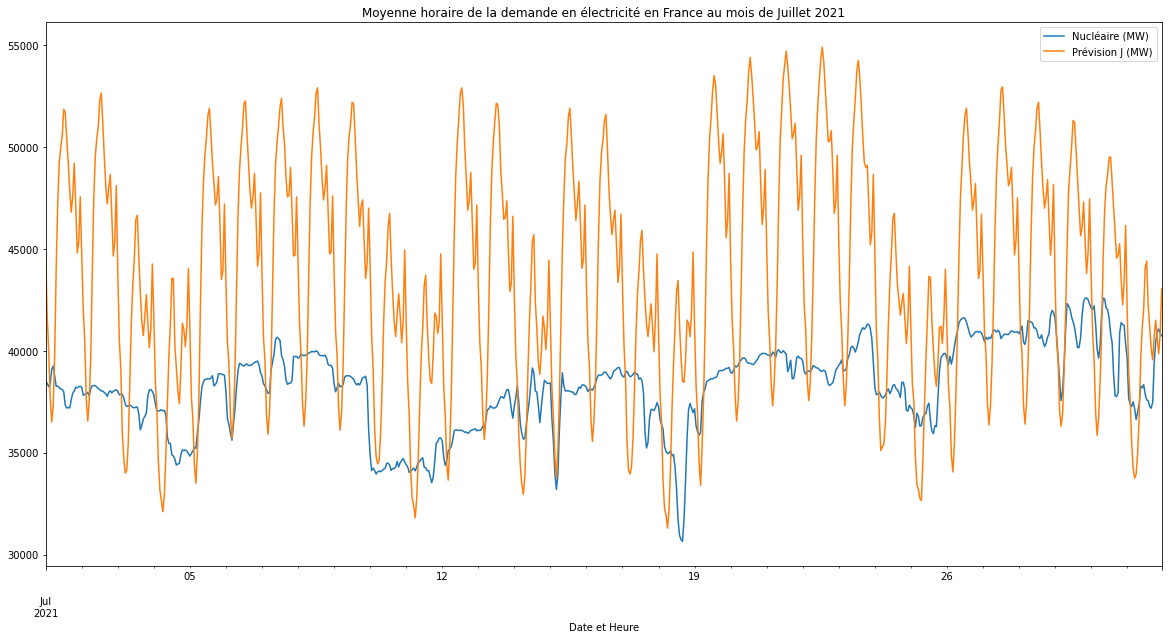

In [19]:
data[['Nucléaire (MW)', 'Prévision J (MW)']].loc[data_prod.index.month == 7].resample('H').mean().plot(figsize=(20,10), 
title="Moyenne horaire de la demande en électricité en France au mois de Juillet 2021")

En observant ce graphique, et bien que la corrélation ne soit pas parfaite on se rends bien compte que les creux les plus importants dans la production nucléaire d'électricité coïncident presque parfaitement avec la chute de demande en énergie électrique française. Ceci ne fait évidemment pas office de preuve de cause à effet mais permet de nous donner une clé supplémentaire dans la compréhension de la variation de production d'électricité nucléaire. 

En partant de ce constat, on peut soulever un point supplémentaire : l'importance de la pilotabilité de la production, ou à minima la pilotabilité de la distribution de l'énergie électrique. 

Il est possible d'étendre cette analyse aux énergies renouvelables afin d'observer si l'argument de la non pilotabilité tiens la route. 

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

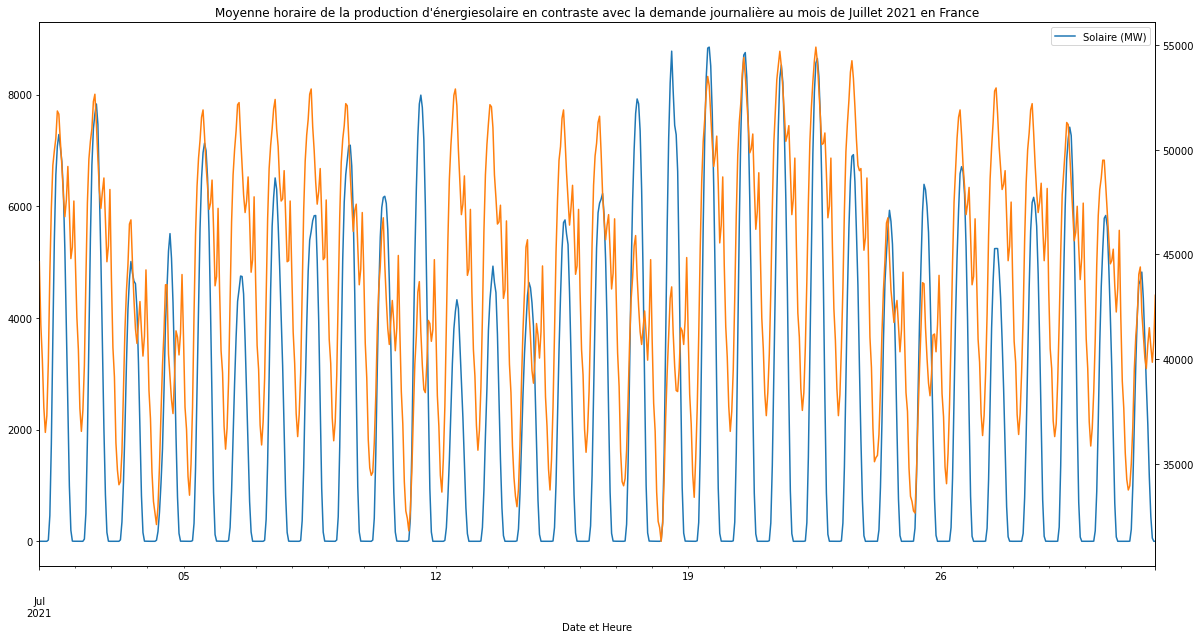

In [20]:
plt.figure()
data[['Solaire (MW)']].loc[data.index.month == 7].resample('H').mean().plot(figsize=(20,10),
title = "Moyenne horaire de la production d'énergiesolaire en contraste avec la demande journalière au mois de Juillet 2021 en France")
data['Prévision J (MW)'].loc[data.index.month == 7].resample('H').mean().plot(secondary_y = True)

Analysons ce résulat. Nous pouvons tout d'abord observer que la fluctuation de la demande en énergie suit remarquablement bien la fluactuation de la production de l'énergie solaire. Cependant il ne faut pas tomber dans le piège de se dire que l'énergie solaire est donc pilotable. En effet, bien que les fluctuations semblent extêmement bien corrélée, il ne faut pas oublier les différences d'échelle. Premier écueil, la production solaire ne diminue pas la nuit, elle devient nulle, alors que la demande ne l'est pas. Deuxième écueil, le pic de production solaire est variable, et donc sur une journée si la demande est forte mais que la production solaire ne suit pas, par manque d'ensoleillement par exemple, il y aurait un manque d'apport. 

Prenons la même étude au niveau éolien.

<AxesSubplot:>

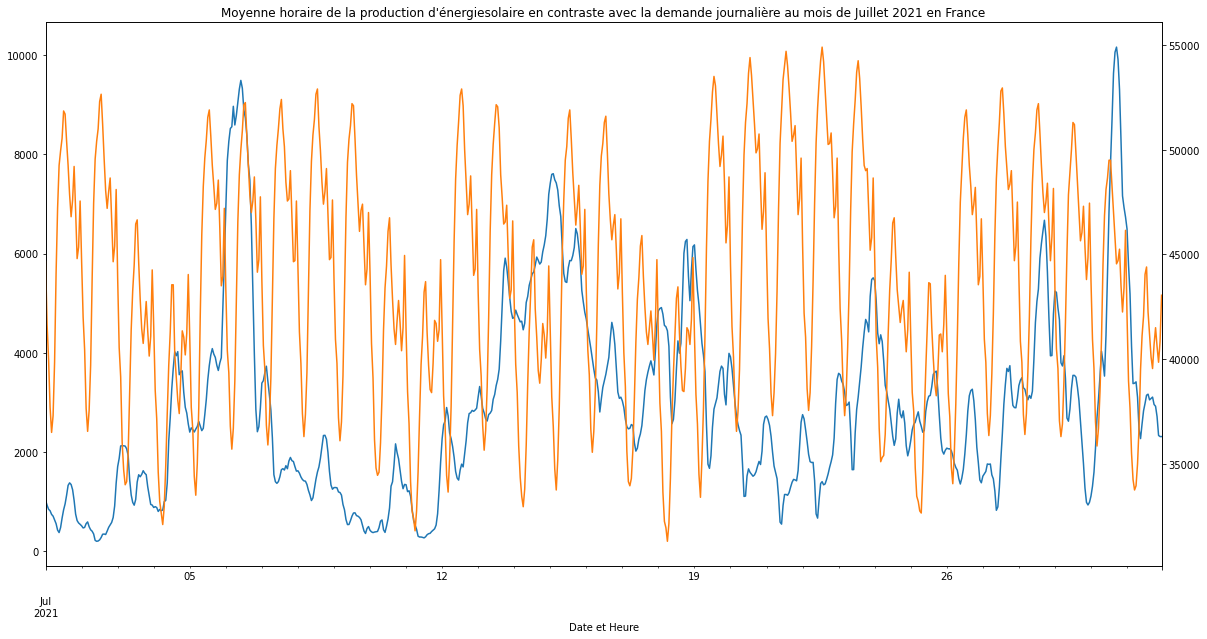

In [21]:
plt.figure()
data['Eolien (MW)'].loc[data.index.month == 7].resample('H').mean().plot(figsize=(20,10),
title = "Moyenne horaire de la production d'énergiesolaire en contraste avec la demande journalière au mois de Juillet 2021 en France")
data['Prévision J (MW)'].loc[data.index.month == 7].resample('H').mean().plot(secondary_y = True)

Cette étude est bien plus édifiante. En effet on remarque une grosse différence avec la corrélation dans la production solaire. En effet, là ou la fluctuation de la production d'énergie solaire suivait assez fidèlement la demande journalière française, la productio éolienne, elle, semble complètement décorrélée de la demande. Sur cette étude on observe bien le caractère non pilotable de la production éolienne, qui ne s'adapte pas du tout à la variation de la demande en énergie française. 

Une des première réponses qui pourrait être adoptée est d'utiliser les deux sources conjointement afin de pallier le manque de production du solaire pendant la nuit avec la production éolienne. Cependant le gros point noir de cette méthode est qu'en cas de pic de demande, ou en cas de chute pbrutale de la production éolienne ou solaire dans la journée, il serait impossible de répondre à la demande en énergie qui elle, ne s'adapte pas à la production. En effet c'est la production qui doit s'adapter à la demande et non l'inverse sous peine de souffrir de périodes d'austérité énergétique. 

## Conclusion de l'étude sur les énergies renouvelables 

Ces différentes études sur les énergies renouvelables nous apportent deux constats :

* Premièrement, la production d'énergie renouvelable est très sujette aux variation environnementales et climatiques. En effet, en l'absence de vent ou d'ensoleillement suffisant la production chute de manière très visualisable. 
* Deuxièmement, en lien avec le premier point, la demande en énergie, bien que fluctuante également et étrangement bien corrélée à la production solaire (du moins sur le mois de l'étude), n'est jamais nulle. Dans ce cadre il faut bien assurer une production énergétique constamment supérieure à un minimum. Cette problématique du minimum de production énergétiue ne peut pas trouver une réponse viable dans la production d'énergie via les énergies renouvelables en l'état. Il faudrait pour cela assurer un stockage de l'énergie excédentaire et trouver un moyen de piloter la mise à disposition de cette énergie de manière efficace et fiable tout au long de l'année, ce qui pour le moment n'est pas le cas. 
* Troisième point, la production d'énergie électrique via des sources renouvelable n'est pas pilotable et a donc besoin d'un back-up via d'autre énergies non renouvelables (notamment nucléaire qui assure la majeure partie de la production d'électricité française tout au long de l'année).


Nous avons vu ces derniers jours différents scénarii développés par différentes entités (GIEC, TheSiftProject pour ne citer qu'eux) concernant l'évolution du mix énergétique français dans les années à venir. Certains de ces scénarios présentent un mix utilisant quasiment 100% d'énergies renouvelables et semble plutôt bien étoffés sur ces questions de la non pilotabilité des énergies renouvelables, notamment en prenant en compte un back up énergétique assuré par l'énergie hydraulique et une augmentation drastique de la production d'énergie via les sources renouvelables. 

L'état de l'art étant fait sur la production actuelle d'énergie en France, nous pouvons à présent nous concentrer sur les autres axes d'études concernant la production d'énergie française, notamment les différents impacts écologiques (émission de gaz à effet de serre (GES), l'aire de production dédiée, les déchets engendrées et l'impact sur les écosystèmes) ainsi que sur les futures évolutions potentielles dans le cadre de la production d'énergie. 

Il est important de rappeler également qu'une remise en question de notre consommation énergétiue doit être fournie pour que ces scénarii soient viables et mis en place, chacun à son échelle, mais nous détaillerons cela plus tard. 


# Impacts environnementaux des différentes sources d'énergies

## Rappels

Afin de mener l'étude des impacts environnementaux nous devons disposer de plusieurs données :
* Premièrement nous nous intéresserons en particulier à l'émission de GES directement liés à la production (c'est à dire sans tenir compte du cycle de vie des installations et autres vecteurs d'énergie utilisés dans la production). Pour cela nous disposons des données issue de la base de données nationale Base Carbone qui regroupent ces données selon les sources d'énergies
* Deuxièmement nous nous intéresserons à l'émission de GES en ce qui concerne la construction des installations et l'extraction des ressources nécessaires à la production énergétique
* Troisèmement nous étudierons l'impact écologique de la fin de vie des installations (gestion des déchets, démantèlement, recyclage, etc)
* Quatrièmement, nous assemblerons toutes les données précédemment recueillies afin d'établir un état de la production en prenant en compte l'entièreté du cycle de production et de vie des installations afin d'avoir les données les plus complètes et factuelles possibles concernant l'impact écologique des différentes sources d'énergie 

## Etude sur l'émission de GES directement liée à la production d'énergie 

### Récupération des données d'émission par source d'énergie

Les données concernant l'émission des différentes sources d'énergie électrique sont disponibles publiquement via la base de données publique Base Carbone. Cette base de données nous apporte les éléments suivants :

* Tout d'abord la valeur moyenne d'émission par kWh en production, en tenant compte du cycle de vie complet de l'installation. Ceci comprends la construction des installations, l'extraction des ressources nécessaires et le fonctionnement nominal
* En creusant un peu, on trouve une ventilation de cette donnée entre "production" et "amont", qu'il faut comprendre par "En fonctionnement" et "en tenant compte de toutes les émissions sur le cycle de vie du produit"*

_(*) Note : Pour le solaire et l'éolien, l'ADEME précise dans la documentation de la base carbone que : "Remarque : afin d’assurer une cohérence de périmètre de comptabilisation avec les autres
facteurs d’émissions « énergie » présents dans la Base Carbone®, les phases de démantèlement
et fin de vie des ouvrages ne sont pas intégrées dans les facteurs d’émission retenus." pour les installations solaires et éoliennes._


Pour le moment nous ne nous intéresserons qu'à l'émission de GES pendant le fonctionnement, et nous incluerons l'ensemble du cycle de vie par la suite.

Nous pouvons d'ores et déjà regrouper les données dans un tableau :

| Source d'énergie             | émission globale (kg/kWh) (Source : Base Carbone) | Emission en production (kg/kWh) (Source : Base Carbone)  |
|------------------------------|:-------------------------------------------------:|:--------------------------------------------------------:|
| Charbon                      |                        1.06                       |                           0.969                          |
| Fioul                        |                        0.73                       |                           0.628                          |
| Gaz                          |                       0.418                       |                           0.351                          |
| Eolien Terrestre             |                       0.0141                      |                            0.0                           |
| Eolien en Mer                |                       0.0156                      |                            0.0                           |
| Hydraulique                  |                       0.006                       |                            0.0                           |
| Solaire (fabrication Chine)  |                       0.0439                      |                            0.0                           |
| Solaire (fabrication Europe) |                       0.0323                      |                            0.0                           |
| Solaire (fabrication France) |                       0.0252                      |                            0.0                           |
| Nucléaire                    |                       0.006                       |                            0.0                           |

Nous pouvons à présent constituer une petite "base de données" contenant ces informations :

In [22]:
list_src = ["Charbon", "Fioul", "Gaz", "Eolien Terrestre","Eolien en mer", "Hydraulique", "Solaire (chine)", "Solaire (Europe)", "Solaire (France)", "Nucléaire"]
list_em_tot = [1.06,0.73,0.418,0.0141,0.0156,0.006,0.0439,0.0323,0.0252,0.006]
list_em_prod = [0.969,0.628,0.351,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

data_emission = pd.DataFrame( {
    "Source d'énergie" : list_src,
    "Emission totale (kg/kWh)" : list_em_tot,
    "Emission en production (kg/kWh)" : list_em_prod
})

data_emission

,Source d'énergie,Emission totale (kg/kWh),Emission en production (kg/kWh)
0,Charbon,1.0600,0.969
1,Fioul,0.7300,0.628
2,Gaz,0.4180,0.351
3,Eolien Terrestre,0.0141,0.000
4,Eolien en mer,0.0156,0.000
5,Hydraulique,0.0060,0.000
6,Solaire (chine),0.0439,0.000
7,Solaire (Europe),0.0323,0.000
8,Solaire (France),0.0252,0.000
9,Nucléaire,0.0060,0.000


Maintenant que cette base est constituée nous pouvons l'améliorer avec les données précédemment obtenues, notamment en compilant l'émission totale en production, et l'émission totale en tenant compte de l'ensemble du cycle de vie. Concernant le parc solaire, l'ADEME indique que la valeur à utiliser par défaut est "Solaire (Chine)". Concernant l'éolien, nous n'avons pas la proportion de chaque technologie concernant le parc éolien français, nous pouvons par défaut utiliser un ratio de 70/30, avec 70% d'éolien terrestre et 30% d'éolien maritime.

Comme on peut le constater avec les données fournies par Base Carbone, on peut omettre les données de production des énergies "vertes", à savoir le solaire, l'éolien, l'hydraulique et le nucléaire puisque ces énergies ne sont pas émettrices de CO2 durant la phase de productio d'électricité. En effet l'ensemble de leurs émissions de CO2 se concentrent sur les phases de construction des installations et d'extraction des différents minerais nécessaires à leur fonctionnement.

In [23]:
data_emission_prod = pd.DataFrame()
data_emission_prod['Charbon (kgCO2e)'] = data_prod['Charbon (MW)'].values * data_emission[data_emission['Source d\'énergie'] == 'Charbon']['Emission en production (kg/kWh)'].values
data_emission_prod['Fioul (kgCO2e)'] = data_prod['Fioul (MW)'].values * data_emission[data_emission['Source d\'énergie'] == 'Fioul']['Emission en production (kg/kWh)'].values
data_emission_prod['Gaz (kgCO2e)'] = data_prod['Gaz (MW)'].values * data_emission[data_emission['Source d\'énergie'] == 'Gaz']['Emission en production (kg/kWh)'].values
data_emission_prod.index = data_prod.index
data_emission_prod

,Charbon (kgCO2e),Fioul (kgCO2e),Gaz (kgCO2e)
Date et Heure,,,
2021-01-01 00:00:00+01:00,6.783,59.032,1949.103
2021-01-01 00:30:00+01:00,6.783,60.916,1978.587
2021-01-01 01:00:00+01:00,6.783,60.916,1584.765
2021-01-01 01:30:00+01:00,6.783,60.916,1530.360
2021-01-01 02:00:00+01:00,6.783,60.916,1401.894
...,...,...,...
2021-12-31 21:30:00+01:00,12.597,64.684,1127.412
2021-12-31 22:00:00+01:00,12.597,63.428,1069.848
2021-12-31 22:30:00+01:00,13.566,63.428,1036.152


Nous avons donc constitué notre dataframe contenant les données d'émissions relatives au fonctionnement des différentes sources d'énergie. Nous pouvons alors étudier lesdites émissions dans un graphique.

<AxesSubplot:title={'center':"Emission de CO2 moyenne par semaine au cours de l'année 2021 ventilées par source d'énergie en France"}, xlabel='Date et Heure'>

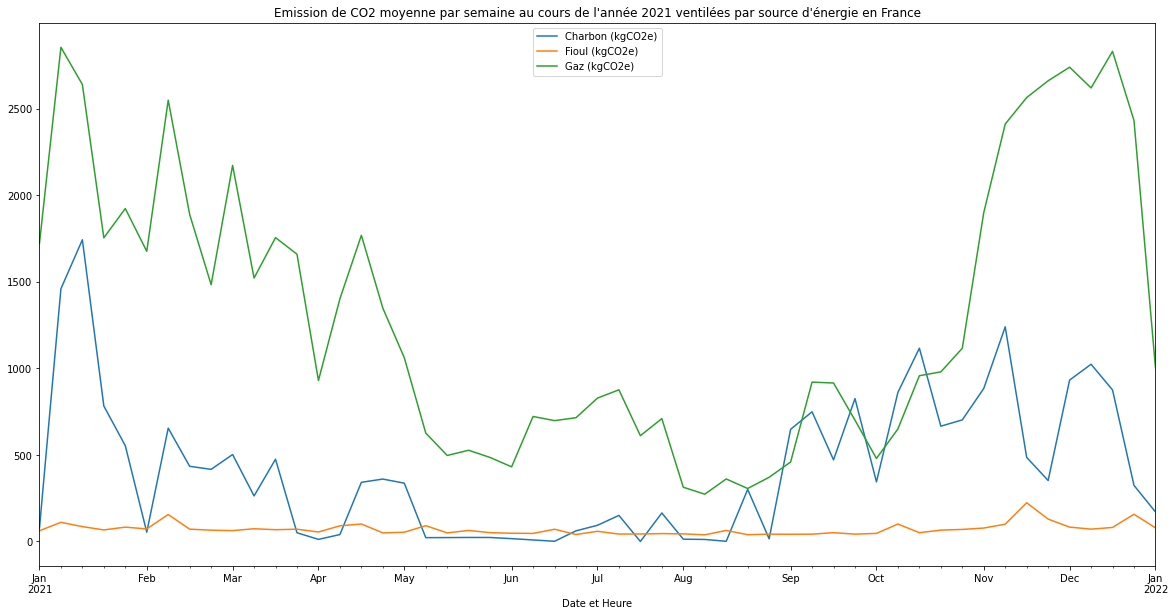

In [24]:
data_emission_prod.resample("W").mean().plot(figsize=(20,10),title = "Emission de CO2 moyenne par semaine au cours de l'année 2021 ventilées "
+"par source d'énergie en France")

En analysant ce graphique on retient que :
* L'énergie la plus émettrice de GES en production directe d'électricité est, en moyenne, le gaz.
* Le charbon, bien que substentiellement moins utilisé par la France pour sa production d'énergie comme nous l'avions vu précédemment, reste extrêmement émetteur de GES en production. On le voit bien lorsque, même avec une production moindre, il émet plus de CO2 que les centrales à gaz en fonctionnement (focus sur le mois d'Octobre 2021)
* Le fioul est également émetteur mais, étant très peu utilisé, les émissions sont moindres, mais néanmoins à peu près constantes, autours de 60kgCO2e tout au long de l'année en moyenne.

Raffinons un peu notre étude et calculons l'émission totale de C02 de ces différentes sources d'énergie lors de l'année 2021 en production.

In [25]:
em_gaz_prod = data_emission_prod['Gaz (kgCO2e)'].sum()
em_charbon_prod = data_emission_prod['Charbon (kgCO2e)'].sum()
em_fioul_prod = data_emission_prod['Fioul (kgCO2e)'].sum()
data_emission['Emission totale en production en 2021 (tCO2e)'] = [em_charbon_prod, em_fioul_prod, em_gaz_prod, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
data_emission

,Source d'énergie,Emission totale (kg/kWh),Emission en production (kg/kWh),Emission totale en production en 2021 (tCO2e)
0,Charbon,1.0600,0.969,7.416480e+06
1,Fioul,0.7300,0.628,1.254887e+06
2,Gaz,0.4180,0.351,2.303152e+07
3,Eolien Terrestre,0.0141,0.000,0.000000e+00
4,Eolien en mer,0.0156,0.000,0.000000e+00
5,Hydraulique,0.0060,0.000,0.000000e+00
6,Solaire (chine),0.0439,0.000,0.000000e+00
7,Solaire (Europe),0.0323,0.000,0.000000e+00
8,Solaire (France),0.0252,0.000,0.000000e+00
9,Nucléaire,0.0060,0.000,0.000000e+00


Notre étude étant effectuée, nous pouvons maintenant observer les chiffres que nous avons sous les yeux :
* Premièrement, nous observons que sur l'année 2021 le Gaz est de loin le premier pollueur en terme d'émissions globale en production avec quelques 23 méga tonnes d'équivalent CO2 émis au global
* Deuxièmement, malgré une part très faible dans la production française globale, le charbon et le fioul émettent à eux deux presque 8,7 méga tonnes de CO2 dont 7,4 méga tonnes pour le seul charbon. On comprends donc bien qu'à production équivalente, il vaut mieux utiliser du gaz que les deux précédents. 
* Troisèmement, il faut noter que si nous n'utilisions que ces données, nous pourrions obtenir la conclusion que les autres sources d'énergie électriques sont absolument neutres en carbone (que des émissions nulles en production), ce qui évidemment serait faux. 

Poursuivons l'étude en ajoutant cette fois les émissions dûes à la construction des installations et à l'extraction des minerais. 


In [26]:
data_emission_total = pd.DataFrame()
data_emission_total['Charbon (tCO2e)'] = data_prod['Charbon (MW)'].values * data_emission[data_emission['Source d\'énergie'] == 'Charbon']['Emission totale (kg/kWh)'].values
data_emission_total['Fioul (tCO2e)'] = data_prod['Fioul (MW)'].values * data_emission[data_emission['Source d\'énergie'] == 'Fioul']['Emission totale (kg/kWh)'].values
data_emission_total['Gaz (tCO2e)'] = data_prod['Gaz (MW)'].values * data_emission[data_emission['Source d\'énergie'] == 'Gaz']['Emission totale (kg/kWh)'].values
data_emission_total['Eolien Mer (tCO2e)'] = data_prod['Eolien (MW)'].values* 0.30 * data_emission[data_emission['Source d\'énergie'] == 'Eolien en mer']['Emission totale (kg/kWh)'].values
data_emission_total['Eolien Terre (tCO2e)'] = data_prod['Eolien (MW)'].values * 0.70 * data_emission[data_emission['Source d\'énergie'] == 'Eolien Terrestre']['Emission totale (kg/kWh)'].values
data_emission_total['Eolien Total (tCO2e'] = data_emission_total['Eolien Mer (tCO2e)'] + data_emission_total['Eolien Terre (tCO2e)']
data_emission_total['Solaire (Chine) (tCO2e)'] = data_prod['Solaire (MW)'].values * data_emission[data_emission['Source d\'énergie'] == 'Solaire (chine)']['Emission totale (kg/kWh)'].values
data_emission_total['Solaire (France) (tCO2e)'] = data_prod['Solaire (MW)'].values * data_emission[data_emission['Source d\'énergie'] == 'Solaire (France)']['Emission totale (kg/kWh)'].values
data_emission_total['Nucléaire (France) (tCO2e)'] = data_prod['Nucléaire (MW)'].values * data_emission[data_emission['Source d\'énergie'] == 'Nucléaire']['Emission totale (kg/kWh)'].values

data_emission_total.index = data_prod.index
data_emission_total

,Charbon (tCO2e),Fioul (tCO2e),Gaz (tCO2e),Eolien Mer (tCO2e),Eolien Terre (tCO2e),Eolien Total (tCO2e,Solaire (Chine) (tCO2e),Solaire (France) (tCO2e),Nucléaire (France) (tCO2e)
Date et Heure,,,,,,,,,
2021-01-01 00:00:00+01:00,7.42,68.62,2321.154,4.37580,9.22845,13.60425,0.0439,0.0252,303.594
2021-01-01 00:30:00+01:00,7.42,70.81,2356.266,7.58160,15.98940,23.57100,0.0000,0.0000,303.210
2021-01-01 01:00:00+01:00,7.42,70.81,1887.270,7.55820,15.94005,23.49825,0.0000,0.0000,302.802
2021-01-01 01:30:00+01:00,7.42,70.81,1822.480,7.60500,16.03875,23.64375,0.0000,0.0000,298.428
2021-01-01 02:00:00+01:00,7.42,70.81,1669.492,7.33356,15.46629,22.79985,0.0000,0.0000,292.698
...,...,...,...,...,...,...,...,...,...
2021-12-31 21:30:00+01:00,13.78,75.19,1342.616,17.03520,35.92680,52.96200,0.1317,0.0756,250.014
2021-12-31 22:00:00+01:00,13.78,73.73,1274.064,17.23176,36.34134,53.57310,0.1756,0.1008,249.786
2021-12-31 22:30:00+01:00,14.84,73.73,1233.936,16.03368,33.81462,49.84830,0.1317,0.0756,249.702


Nous pouvons alors, de la même manière que précédemment, étudier ces données dans un graphique ce qui sera bien plus édifiant.

<AxesSubplot:title={'center':"Emissions liées à la production d'électricité en France en 2021 ventilées par source d'énergie et en tenant compte de l'entièreté de la durée de vie des installations (exception sur le solaire et l'éolien dont la fin de vie est exclue du scope)"}, xlabel='Date et Heure'>

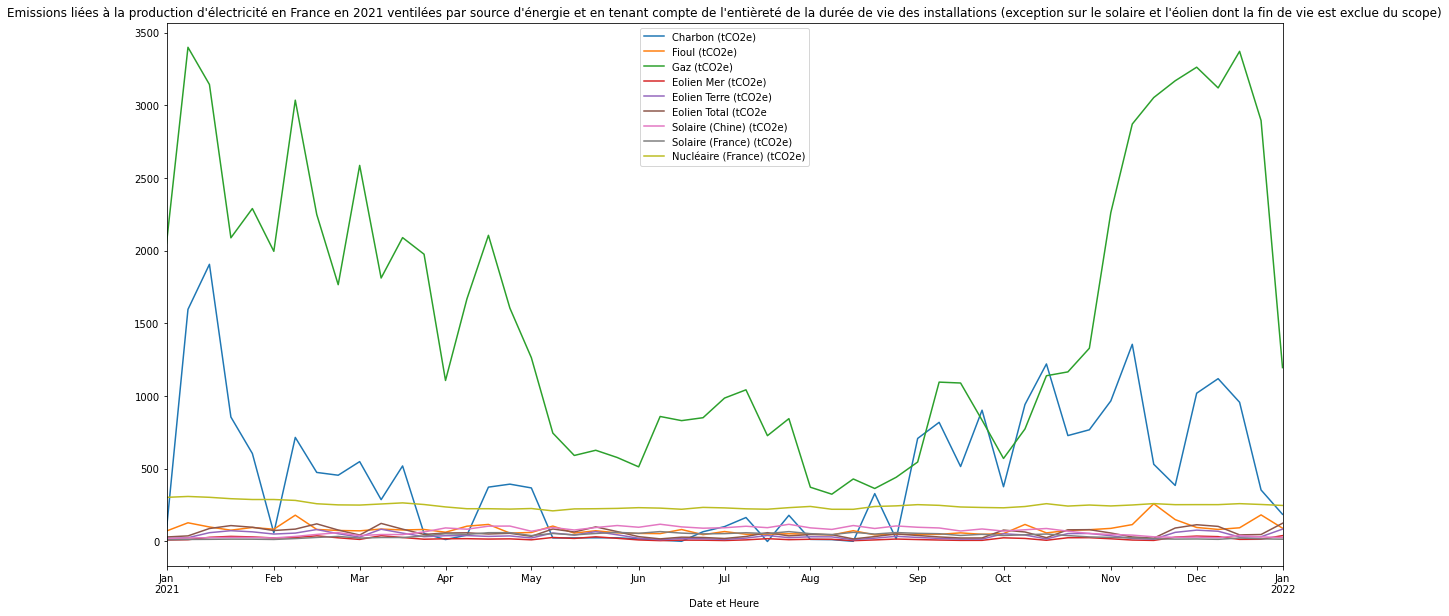

In [27]:
data_emission_total.resample('W').mean().plot(figsize=(20,10),
title = "Emissions liées à la production d'électricité en France en 2021 ventilées par source d'énergie et en tenant compte de l'entièreté "
+"de la durée de vie des installations (exception sur le solaire et l'éolien dont la fin de vie est exclue du scope)")

Une fois de plus ce graphique est très éloquent. En effet on remarque bien que les industries les plus polluantes, même en tenant compte de l'entièreté du cycle de vie des installations, sont le gaz et le charbon (et haut la main). Ce résultat était attendu, mais nous pouvons pousser l'analyse un peu plus loin : 
* On remarque que la pollution induite par la production nucléaire est remarquablement constante tout au long de l'année, se stabilisant autours de 300 tonnes de CO2 
* Nous pouvons également remarquer qu'après les deux précédentes industries la plus polluante est en effet le nucléaire ! Mais, encore une fois, il ne faut pas seulement s'arrêter à ce genre de graphique. Déjà avec les données de Base Carbone nous savons qu'en proportion l'énergie nucléaire est la moins polluante, conjointement avec l'énergie hydraulique. De plus, il ne faut pas oublier que la majeure partie de l'électricité française est dûe au nucléaire ! Mais afin de bien se rendre compte nous allons analyser tout ceci dans une autre représentation plus bas. 

Afin d'analyser plus finement les données concernant les énergies les plus faiblement émettrice nous pouvons reprendre le même graphique mais en ommettant le gaz et le charbon :

<AxesSubplot:title={'center':"Emissions liées à la production d'électricité en France en 2021 ventilées par source d'énergie et en tenant compte de l'entièreté de la durée de vie des installations (exception sur le solaire et l'éolien dont la fin de vie est exclue du scope)"}, xlabel='Date et Heure'>

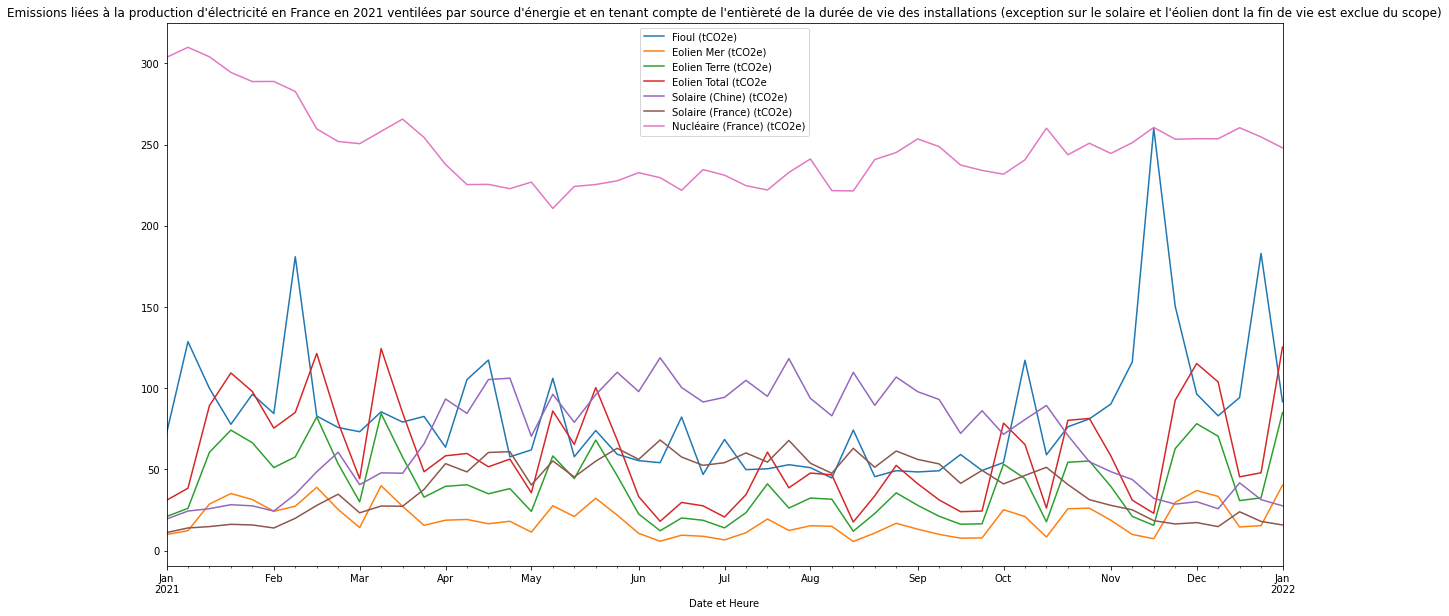

In [28]:
data_emission_total.drop(columns=['Charbon (tCO2e)','Gaz (tCO2e)']).resample('W').mean().plot(figsize=(20,10),
title = "Emissions liées à la production d'électricité en France en 2021 ventilées par source d'énergie et en tenant compte de l'entièreté "
+"de la durée de vie des installations (exception sur le solaire et l'éolien dont la fin de vie est exclue du scope)")

En analysant une nouvelle fois le graphique que nous avons sous les yeux, nous pouvons remarquer deux choses importantes :
* Premièrement, la pollution liée au nucléaire est très stable, autours de 250tCO2e par semaine.
* Deuxièmement, le fioul, bien que bien moins utilisé que les autres sources d'énergie, émet plus de GES (Nucléaire omis). Sur une semaine de forte demande (on peut supposer une semaine de grand froid en hiver), il arrive même à atteindre le niveau d'émission du nucléaire. 
* Troisièmement, l'énergie éolienne d'origine maritime semble la moins émettrice sur l'année 2021 en moyenne hebdomadaire, en tenant compte de son cycle de vie (démentèlement des installations exclu)

Maintenant que ces analyses ont été menée, nous pouvons étudier une seconde information, très importante dans notre cas : la part des émission par source d'énergie sur l'année complète, ainsi que la part de production d'énergie électrique par source. 

En effet, avec les données dont nous disposons actuellement nous pourrions arriver à la conclusion qu'il faut en priorité développer l'énergie éolienne maritime, qui semble être la moins polluante. Cependant, ce raisonnement simpliste omet que les données que nous avons présenté ci dessus ont été établies à partir de la production liée à la source d'énergie en question sur l'année 2021. Donc les résultats sont plus complexe que ça. C'est grâce à cette information que nous pouvons affirmer que le fioul, le gaz et le charbon ne sont en aucun cas des énergies à favoriser, car leur part dans la production est minime, et leur part dans les émissions est énorme. 

Vérifions cela avec un nouveau graphique qui sera sans doute plus éloquent. 

<AxesSubplot:title={'center':"Part dans les émissions liées à la production d'électricité en France en 2021 ventilées par source d'énergie et en tenant compte de l'entièreté de la durée de vie des installations (exception sur le solaire et l'éolien dont la fin de vie est exclue du scope)"}, xlabel='Date et Heure'>

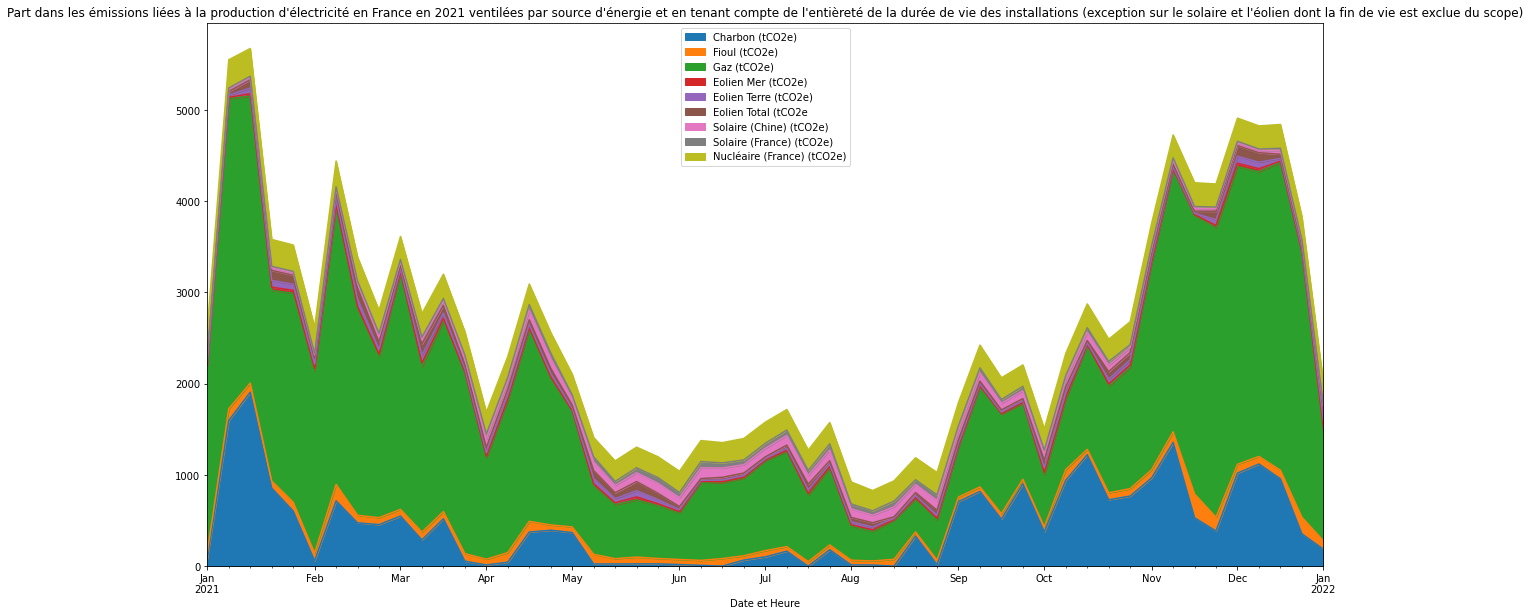

In [29]:
data_emission_total.resample('W').mean().plot.area(figsize=(20,10),
title = "Part dans les émissions liées à la production d'électricité en France en 2021 ventilées par source d'énergie et en tenant compte de l'entièreté "
+"de la durée de vie des installations (exception sur le solaire et l'éolien dont la fin de vie est exclue du scope)")

Le graphique est édifiant ! Nous voyons très clairement que le gaz et le charbon sont responsables de ma majeure partie des émissions française ! Pour rappel, revoici le graphique concernant la part de chaque énergie dans la production d'électricité : 

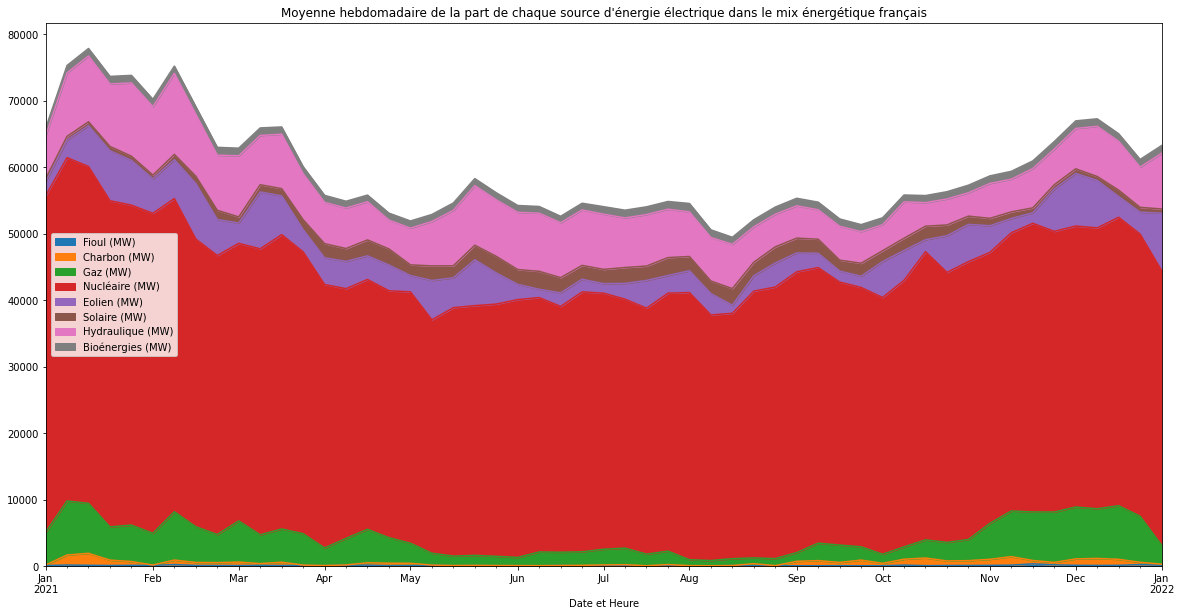

In [30]:
fig_prod_area

Le contraste est saisissant ! Pour une part très faible dans la production globale d'électricité, le charbon et le gaz sont les principaux responsables des emissions globales de GES !

Mais ces résultats sont connus de tous, depuis un bon petit moment déjà pour la plupart d'entre vous. En effet les récents débats autours de la production d'énergie tournent plutôt autour du nucléaire et des énergies renouvelable. ces derniers jours le gaz s'est vu ajouté au débat avec la nouvelle taxonomie "Verte" européenne qui inclue le gaz (avec de grosses contraintes néanmoins). Il faudrait donc regarder de plus prêt les avantages et inconvénients de *CES* énergies en particulier. 

Pour le reste, nous sommes tous globalement d'accord que l'utilisation du gaz et du charbon dans la production d'électricité est une calamité sans nom et que cela doit cesser au plus tôt. Mais quelle énergie pour les remplacer ?
Les prétendants sont au nombre de 3 en France. Nous avons le solaire, l'éolien et le nucléaire. En effet nous ne pouvons pas évoquer l'hydraulique dans cette partie car il n'y a plus de sites disponible pour la construction de barrages hydroélectrique en France. 

Chacun comporte des avantages et des inconvénients plus ou moins importants que nous allons évoquer dans la suite de ce papier. 

# Focus sur les énergies renouvelables et le nucléaire, de la construction au démantèlement 

Afin d'obtenir les données les plus complètes possibles, nous devons étendre notre étude aux énergies renouvelables et au nucléaire, et pour ce faire nous devons étudier l'impact environnemental des structures nécessaires, depuis la construction jusqu'au démantèlement. 

Nous étudierons dans ce cadre les impacts environnementaux de la construction des structures, leur occupation de l'espace au sol, la pollution potentielle sur les ecosystèmes (ou, à minima la perturbation sur les ecosystèmes engendrés par la présence des constructions), leur démentèlement et la gestion des déchets engendrés par la production d'électricité. 

Voici un rapide sommaire :

- [Construction et impact environnemental des structures](#construction-et-impact-environnemental-des-structures-construction-et-impact)
    - [Matières premières et coût de la construction des infrastructures](#matières-premières-et-coûts-de-la-construction-des-infrastructures-nécessaires-matieres-premieres)
    - [Espace au sol occupé](#espace-au-sol-occupé)
- [Démantèlement des structures](#démantèlement-des-structures)
    - [Recyclage des matériaux](#recyclage-des-matériaux)
    - [Avenir des écosystèmes impactés](#avenir-des-écosystèmes-impactés)
- [Gestion des déchets](#gestion-des-déchets)
    - [Focus sur le nucléaire](#focus-sur-le-nucléaire)
    - [Focus sur l'éolien](#focus-sur-léolien)
    - [Focus sur le solaire](#focus-sur-le-solaire)
- [Mise en commun](#mise-en-commun-des-données)
    - [Construction d'un nouvel indicateur](#construction-dun-nouvel-indicateur)
    - [Mise en concurrence des données](#mise-en-concurrence-des-données)
- [Conclusion de l'étude](#conclusion-de-létude)

## Construction et impact environnemental des structures

Afin de bien rendre compte des différents impact environnementaux que pourraient avoir les différentes structures nous allons étudier en premier lieux les émissions de la construction des infrastructures et matières premières nécessaires, puis nous analyserons la surface au sol utilisée pour lancer la production, et enfin la pollution engendrée au niveau des écosystèmes présents.

### Matières premières et coûts de la construction des infrastructures nécessaires 

Il est facile d'évaluer l'impact environnemental de la production des infrastructures. En effet, si nous nous rappelons bien de la précédente étude sur les émissions de GES par les différentes technologies productrices d'électricité, il était cité dans la Base Carbone des données concernant la masse de CO2 équivalente produite en tenant compte de la construction des infrastructures. En utilisant cette données, exprimée en kgCO2e/kWh, nous avons un indicateur direct de l'émission des différentes technologies lors de leur production. 

En effet, pour calculer une telle donnée il y a plusieurs étapes :
* Calculer les émissions lors de la construction des infrastructures
* Estimer la production totale sur la durée de vie de l'installation 
* Diviser les émissions par la production totale

On voit bien dans ce calcul qu'il est finalement représentatif de la pollution atmosphérique engendrée par les infrastructures. Pas besoin d'aller chercher plus loin sur ce point donc. 

En revanche, concernant les matières premières c'est une toute autre histoire. En effet, il est ici question de souveraineté plus que de pollution.
* Dans le cadre du nucléaire, nous pouvons produire nos infrastructures avec des entreprises françaises (notamment grâce au rachat récent des turbines Arabelles à General Electrics qui leur permet de revenir dans le giron industriel français). Le plus gros problème réside dans l'approvisionnement en uranium 235 et son enrichissement. Les usines d'enrichissement de l'uranium sont bien évidemment sur le sol français pour le moment. Mais les mines d'extractions françaises ne sont plus en activité depuis 2001, date de fermeture de la dernière mine. L'extraction a en effet été délocalisée, notamment au Niger. Dans ce cadre il devient légitime de se poser la question des conditions de travail des mineurs, notamment Nigérian *(Source : Wikipédia)*. 
* Dans le cadre du solaire, nous avons vu précédemment trois mesures différentes de l'impact écologique des panneaux solaire. Ces différences sont expliquées par le fait que selon la zone géographique de prodution, il n'y a pas les mêmes normes environnementales appliquées aux industries d'une part, et d'autre par la question de l'acheminement des panneaux. Il est donc compréhensible que dans ce cadre les panneaux produits en Chine soient plus émetteur que les panneaux européens, eux-mêmes plus émetteurs que les panneaux français. Il est également légitime dans ce cadre de se poser la question des conditions de travail des ouvriers producteurs, notamment Chinois. 
Et la différence est très notable, puisque d'après les données Base Carbone les panneaux Chinois sont presques deux fois plus émetteurs au global que les panneaux français. Il est donc logique de penser que si l'Etat français veut appuyer la production solaire en France, il appuie également la production de panneaux solaires sur notre sol afin de limiter leur impact en production et importation. 
* Dans le cadre de l'éolien, nous avons également plusieurs mesures concernant l'éolien terrestre et l'éolien maritime. En effet les modalités d'établissement d'une éolienne sont différentes selon qu'elle soit en mer ou sur terre. De plus, les parties les plus critiques de ces installations sont actuellement fabriquées en composites, matériaux qui demande énormément de ressources à la production et qui explique aussi en partie ces chiffres de pollution globale. 

Les différentes énergies ont donc déjà été étudiées en ce qui concerne leurs émissions pendant la construction des infrastructures et le coût des matières premières. Si l'on se contente de ce prisme il est facile de dire que le nucléaire est donc la meilleure énergie à notre disposition. Cette réponse est d'ailleurs encore plus mise en avant lorsque l'on se rappelle que les données de la Base Carbone ne prennent pas en compte le démantèlement des installations solaires et éoliennes. 

__Cependant__ il est important de rappeler que les analyses des différentes énergies ne sont pas terminées, et qu'il faut encore pousser les recherches afin d'avoir une réponse la plus exhaustive et complète possible. C'est ce que nous allons étudier dans la suite de ce document. 


### Espace au sol occupé 



Afin de quantifier l'impact au sol des différentes sources d'énergie il va falloir estimer plusieurs choses et essayer de chiffrer les différents impacts. Pour ce faire nous devrons disposer de trois données principales : la surface au sol occupée par une installation (une éolienne, un réacteur nucléaire, un panneau solaire, un barrage hydroélectrique), la production électrique totale d'une installation sur sa durée de vie et pour finir l'impact au sol des matériaux utilisés (béton, bois, etc).

#### Surface au sol occupée 

Concernant la surface au sol occupée par une installation nous pouvons obtenir les données ci-après. 

*Note (1): Concernant les installations nucléaire nous allons utiliser une centrale française moyenne pour baser nos données dessus. J'ai choisi d'utiliser la centrale de Nogent Sur Seine, qui comporte 2 réacteurs de 1350MW chacun, qui représente à peu près la moyenne française.*

*Note (2): concernant la production éolienne la distinction sera faite entre les éoliennes terrestres et off-shore. De plus nous compterons également que la surface utile au sol d'une éolienne ne se limite pas à ses fondations, mais à toute la surface occupée par une seule éolienne sans qu'aucune autre ne puisse être installée. Il y aura donc deux mesures concernant les éoliennes : la surface des fondations et la surface "utile".*

|   **_Installation_**   | **_Superficie occupée_** | **_Superficie utile au sol_** | **_Production électrique_** | **_Ratio MW/km2_** |
|:----------------------:|:------------------------:|:-----------------------------:|:---------------------------:|:------------------:|
|      **_Solaire_**     |          1.7 m2          |               -               |            306 W            |         180        |
| **_Eolien terrestre_** |          0.5 km2         |       0.0015 - 0.0030 km2     |           2 - 8 MW          |       4 - 16       |
|  **_Eolien maritime_** |          0.5 km2         |               -               |         2.5 - 10 MW         |       5 - 20       |
|     **_Nucléaire_**    |         2,12 km2         |            0.55 km2           |           2700 MW           |        2455        |


#### Explications et calculs 

Dans cette section seront expliqués les différents calculs et méthodes utilisées afin d'établir les différents chiffres renseignés dans ce tableau. 
* En ce qui concerne le solaire, j'ai considéré un panneau solaire avec un rendement de 18% et d'une taille de 1,7m², ce qui est la taille et le rendement moyen de panneaux habituellement utilisés en France. *(Source : [ENGIE](https://mypower.engie.fr/energie-solaire/conseils/rendement-panneau-solaire.html))*. Afin d'obtenir la puissance moyenne produite par le panneau, j'ai utilisé la puissance moyenne reçue en France qui est d'environ 1000W/m² en moyenne sur l'année entière. Cette mesure est évidemment soumise à variation dans la journée et également selon la saison et l'emplacement sur le territoire français. En utilisant ces données nous obtenons donc une production de 306W par panneau et une densité de production de 180MW/km² 
* En ce qui concerne l'éolien (terrestre et maritime) le calcul a été plus compliqué. En effet, l'emprise au sol en lui même avec les fondations et les pistes d'accès spécialisées la superficie réelle occupée au sol est d'environ 15 à 30 ares (0.0015-0.0030km²). Cependant, étant donné les réglementations et autres normes, il est nécessaire de ne trouver qu'une seule éolienne par demi-kilomètre carré. L'explication se trouve dans le bruit émis par une éolienne, et également dans la perturbation entre les éoliennes dûe aux turbulences induites dans leur sillage par les pâles tourtantes. On considère ainsi qu'une éolienne occupe en réalité 0.5km² en moyenne. Cependant cette emprise n'est pas une pollution directe des sols puisque cette pollution est principalement induite par les fondations et les routes d'accès, donc la deuxième mesure.
* Concernant l'éolien maritime, l'emprise est la même selon les différentes étude que j'ai pu trouvé. Cependant, la surface occupé directement au sol sur le plancher marin est moindre, et est d'ailleurs valorisée avec le temps puisque devenant des massifs pour des espèces sédentaires (moules, huîtres, etc). 
* En ce qui concerne le nucléaire j'ai utilisé la centrale de Nogent Sur Seine constituée de 2 réacteurs nucléaires de 1350MW de puissance nominale. J'ai également considéré que le site de Nogent occupe une surface de 212 ha(=2.12km²) pour une installation à l'initial de 4 réacteurs. La centrale ne possède actuellement que 2 de ces réacteurs prévus pour des causes diverses et variées. Cela ramène l'emprise au sol d'un réacteur de 1350MW à 0.55km² environ. De plus cette mesure prends en compte toute l'installation, pas uniquement les réacteurs en eux mêmes. 

#### Impact au sol des matériaux

Concernant l'impact au sol des matériaux utilisés nous avons donc du côté des centrales nucléaires et des éoliennes du béton armé, donc un impact assez marqué, bien que lors du démantèlement des différentes structures les nouvelles normes imposent une remise à niveau du sol comme aux alentours. En ce sens nous avons donc un sol stérilisé par du béton seulement sur la durée de vie de la structure. 

Pour les fermes solaires les panneaux sont montés sur des poutrelles en métal plantées dans le sol. En ce sens l'impact au sol est relativement minime, car cela perturbe très peu les écosystèmes au sol. Cependant il faut également considéré que dans cette configuration le soleil n'éclaire plus le sol et donc la ferme solaire prive d'énergie lumineuse la plupart des plantes au sol, perturbant ainsi le fonctionnement global de l'écosystème en surface. Cependant cela reste quand même la moins impactantes des installations. 

Pour finir, les éoliennes offshores possèdent des fondations bétonnées mais plus faiblement que les éoliennes terrestres, et qu'elles sont principalement complétées par des structures en acier. Ces dernières sont d'ailleurs valorisées au fil du temps en devenant de nouveaux massifs pour les espèces marines. 

Compte tenu de ces différentes informations j'applique alors une transformation sur la donnée afin d'obtenir une échelle d'impact au sol. Dans un soucis d'équité (puisqu'il n'est question que d'un panneau dans la comparaison ci-dessus) je partirai du principe que dans le cadre d'une ferme solaire on trouve à minima autant de paneaux que nécessaire pour produire autant qu'une éolienne terrestre (i.e sur la même zone que la ferme solaire). Dans ce cadre nous pouvons utiliser les ratios MW/km2 qui nous apportent alors une estimation de la surface qu'occuperai une ferme solaire produisant 10MW d'électricité (puissance moyenne d'une éolienne terrestre). On a alors que la surface équivalente utilisée par une ferme solaire est : 


$a_{eq} = eolien_{ratio}/solar_{ratio} * 1km2$

In [31]:
surface_eq_solaire = 10/180 #On utilise les ratios MW/km2 afin d'obtenir la surface équivalente en km2. 
print(f'La surface équivalente solaire est donc de {surface_eq_solaire} km²')

La surface équivalente solaire est donc de 0.05555555555555555 km²


Maintenant que nous disposons de cette surface, nous pouvons établir notre échelle d'impact au sol. Nous pouvons alors utiliser la fonction MinMaxScaler de ScikitLearn qui nous permet d'établir une échelle de transformation sur des données entre le minimum et le maximum. De plus, nous avons vu précédemment que les fermes solaires sont la source d'énergie qui a le moins d'impact au sol. Nous allons donc appliquer une diminution de la surface équivalente utilisée dans le calcul, puisque qu'à surface équivalente le solaire aura toujours moins d'impact. Je n'ai pas pu trouver d'étude suffisamment précise sur le sujet pour déterminer la manière dont il fallait quantifier cette diminution donc j'appliquerai un coefficient lambda personnel. 

De la même manière je corrige la surface au sol utilisée pour les éoliennes maritimes puisque, comme nous l'avons vu, la base bétonnée utilisée est revalorisée par la nature elle même en récifs.

In [32]:
from sklearn.preprocessing import MinMaxScaler
surface_eq_solaire_corrige = surface_eq_solaire * 0.15 
surface_eolien_mer = 0.5 * 0.75
list_impact_surface = [[1,surface_eq_solaire_corrige],[2,0.5], [3,surface_eolien_mer], [4,2.12]]
scaler = MinMaxScaler()  #On instancie le scaler
index_impact = [index[1] for index in (scaler.fit_transform(list_impact_surface) + 1)] #on transforme nos données et on récupère ce qui nous intéresse
print(index_impact)

[1.0, 1.2328334648776638, 1.1736385161799525, 2.0]


Nous pouvons alors donner les facteurs suivants : 

|   **_Installation_**   | **_Facteur d'impact_**   |
|:----------------------:|:------------------------:|
|      **_Solaire_**     |          1               |
| **_Eolien terrestre_** |          1.23            |
|  **_Eolien maritime_** |          1.17            |
|     **_Nucléaire_**    |          2               |

*Note : je n'ai trouvé aucune étude sur le sujet lors de ma phase de recherche, j'ai constitué ces facteurs un peu empiriquement. En partant du principe que l'éolien maritime à l'impact au sol le plus valorisée lors de son fonctionnement, son index est 1. Puis le solaire, coupant seulement l'éclairement. J'ai donc attribué un impact de 1,2. Puis pour les éoliennes terrestres j'ai estimé également que la revalorisation des sols après démantèlement est bien plus faisable qu'après le démantèlement d'une centrale nucléaire, malgrès l'utilisation de matériau similaires. D'où des facteurs d'impact de respectivement 1.5 et 2.*

Regroupons ces données dans une dataframe afin d'en faire l'exploitation. 

In [33]:
list_instal= ["Solaire", "Eolien terrestre", "Eolien maritime", "Nucléaire"]
list_surface = [1.7E-6,0.5,0.5,2.12]
list_utile = [0.0,0.0023,0.0,0.55]
list_prod = [306,5E6,6E6,1350E6]
list_ratio = [180, 10,12,2455]
list_index = index_impact

data_impact = pd.DataFrame({
    "Installation" : list_instal,
    "Surface occupée (km2)" : list_surface,
    "Surface au sol (km2)" : list_utile,
    "Production d'électricité (W)": list_prod,
    "Ratio MW/km2": list_ratio,
    "Index impact":list_index
})
data_impact

,Installation,Surface occupée (km2),Surface au sol (km2),Production d'électricité (W),Ratio MW/km2,Index impact
0,Solaire,0.000002,0.0000,3.060000e+02,180,1.000000
1,Eolien terrestre,0.500000,0.0023,5.000000e+06,10,1.232833
2,Eolien maritime,0.500000,0.0000,6.000000e+06,12,1.173639
3,Nucléaire,2.120000,0.5500,1.350000e+09,2455,2.000000


Maintenant que nous disposons de toutes les données chiffrées dont nous avons besoin il nous faut les aggréger en une seule valeur numérique afin de pouvoir rendre une comparaison efficace.

Ma proposition est la suivante : 

$\alpha_{impact} = \rho/\beta$ où :
* $\beta$ est l'index que nous avons calculé précédemment.
* $\alpha_{impact}$ le nouvel index unique d'impact au sol.
* $\rho$ est le ratio MW/km2 renseigné ci-dessus. 

 Ce calcul prends donc en compte les avantages des différentes sources d'énergies (production plus ou moins importante au km2) et également les inconvénients (impact plus ou moins large au sol selon la source). Il n'est sans doute pas parfait mais permet de rendre assez bien compte de manière neutre les impacts au sol des différentes sources d'énergie rapporté au kilomètre carré. Ainsi nous corrigeons la donnée "Ratio MW/km2" en y incluant une notion d'impact au sol afin de ne pas avoir pour seule donnée utile la production d'énergie (sinon dans ce cadre autant ne pas continuer ce papier et se tourner directement sur le nucléaire sans se poser plus de questions). 
 
 Nous pouvons dès lors l'ajouter à notre dataframe :

In [34]:
data_impact["MW/km2 corrigé par l'index d'impact"] = data_impact["Ratio MW/km2"]/data_impact["Index impact"]
data_impact

,Installation,Surface occupée (km2),Surface au sol (km2),Production d'électricité (W),Ratio MW/km2,Index impact,MW/km2 corrigé par l'index d'impact
0,Solaire,0.000002,0.0000,3.060000e+02,180,1.000000,180.000000
1,Eolien terrestre,0.500000,0.0023,5.000000e+06,10,1.232833,8.111396
2,Eolien maritime,0.500000,0.0000,6.000000e+06,12,1.173639,10.224613
3,Nucléaire,2.120000,0.5500,1.350000e+09,2455,2.000000,1227.500000


Maintenant nous pouvons utiliser cette donnée pour faire une comparaison. Nous pouvons observer la différence sur par rapport au ratio calculé précedemment grâce au graphique suivant :


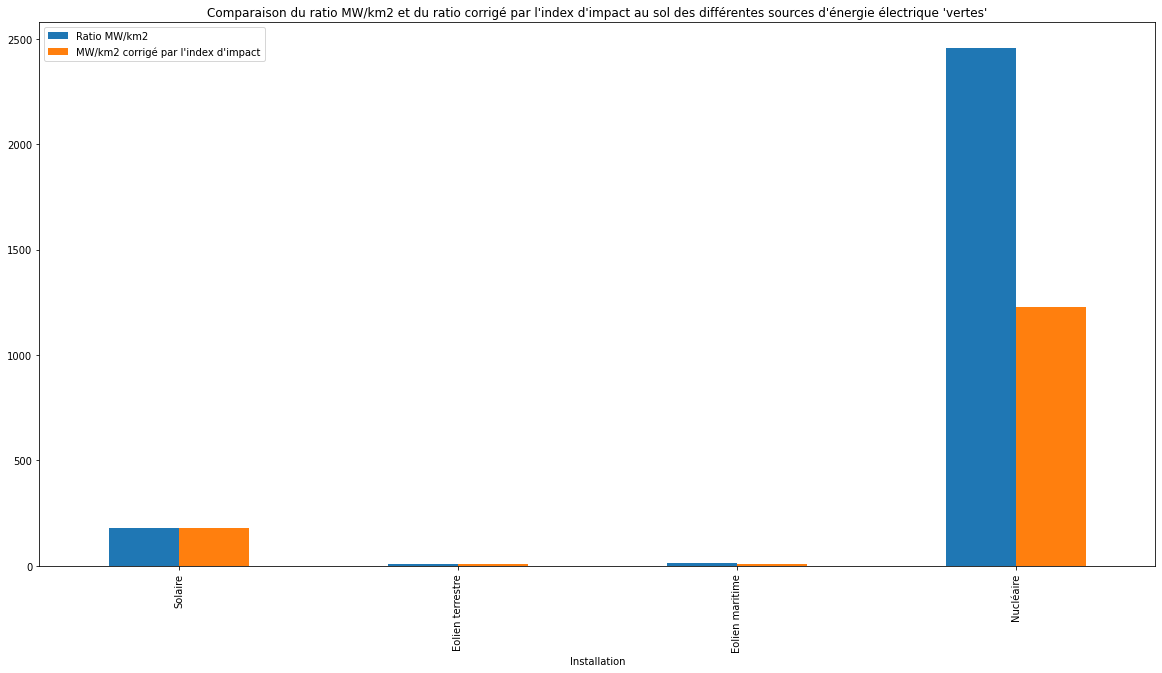

In [37]:
df_compare = data_impact[["Installation","Ratio MW/km2","MW/km2 corrigé par l'index d'impact"]].set_index("Installation").plot.bar(figsize=(20,10),
title="Comparaison du ratio MW/km2 et du ratio corrigé par l'index d'impact au sol des différentes sources d'énergie électrique 'vertes'")

Comme nous pouvons l'observer sur ce graphique, le nucléaire reste sommes toute le grand "vainqueur" en l'espèce. En effet, il conserve la meilleure densité énergétique (MW/km2) malgré un impact sur les sols le plus conséquent de toutes les sources que nous avons étudié. A contrario, les sources éoliennes ont une très faible densité énergétique. Dans ce domaine l'énergie solaire offre une solution très honorable avec une densité énergétique, certes moindre que le nucléaire mais plus importante que l'énergie éolienne. De plus c'est la sources d'énergie qui présente le moins d'impact au sol parmi toutes celles étudiées. 

Nous pouvons garder à l'esprit notre dernier indicateur calculé qui nous servira lors de la mise en commun des données construites. Pour ce faire nous l'ajoutons à une dataframe spécifique qui comporte également la donnée d'émission globale par kWh :

In [41]:
list_energie = ["Solaire (Chine)", "Solaire (Europe)" ,"Solaire (France)", "Eolien Mer", "Eolien Terre", "Nucléaire"]
list_emission = [0.0439,0.0323,0.252,0.0156,0.0141,0.0060]
list_indic_impact = [180,180,180,10.22,8.11,1228]
data_final = pd.DataFrame({
    "Source d'énergie" : list_energie,
    "Emission totale (kg/kWh)" : list_emission,
    "MW/km2 corrigé par l'index d'impact" : list_indic_impact
})

data_final 

,Source d'énergie,Emission totale (kg/kWh),MW/km2 corrigé par l'index d'impact
0,Solaire (Chine),0.0439,180.00
1,Solaire (Europe),0.0323,180.00
2,Solaire (France),0.2520,180.00
3,Eolien Mer,0.0156,10.22
4,Eolien Terre,0.0141,8.11
5,Nucléaire,0.0060,1228.00


Nous pouvons dès à présent nous interesser à la fin de vie des différentes structures.

## Démantèlement des structures 

Cette partie concerne uniquement le démantèlement des structures, c'est à dire le recyclage des différents matériaux utilisés, la difficulté de démantèlement, la durée de vie des installations et l'avenir des écosystèmes impactés par la présence de la source d'énergie. 

### Recyclage des matériaux 



Afin de donner un indicateur fiable dans le cadre de la quantification de l'efficacité du recyclage des matériaux utilisés nous devons nous interesser en premier lieux aux différents matériaux constitutifs des différentes structures, leur potentiel de recyclage ainsi que la facilité de démantèlement. Pour ce faire nous disposons de plusieurs sources différentes suivant les sources d'énergies considérées. 

#### Le solaire

Concernant les panneaux solaires actuels, plus de 94 à 95% (selon les sources) du panneau sont recyclables. En effet, ce dernier est constitué de 70 à 75% de verre, puis d'aluminium, de cuivre de silicium et de polymères (plastiques) qui sont tous recyclables. La durée de vie moyenne annoncée est d'environ 30 ans avant remplacement des panneaux et le silicium utilisé pour les cellules photovoltaïques peut être recyclé au moins 3 ou 4 fois selon les sources, ce qui pousse la durée de vie des installations solaires avec remplacement et recyclage des cellules photovoltaïques à plus de 100 ans. 

Engie estime un coût du recyclage d'environ 1.57€ par panneau actuellement. Ce prix étant fixé par les acteurs du marché il est sujet à fluctuation mais nous pouvons nous en servir comme d'une base. 

De plus, la législation actuellement en vigueur impose que lors du démantèlement d'une centrale solaire le territoire foncier utilisé pour la centrale soit rendu à l'état initial, ou bien qu'il soit de nouveau utilisé pour accueillir une nouvelle centrale solaire. Dans ce cas on parle alors de repowering. 

Grâce à toutes ces informations on se rends bien compte que l'énergie solaire possède un immense potentiel. Sa durée de vie, son potentiel de recyclabilité et son rendement qui ne cesse d'augmenter en fait une énergie compétitive. 

**DE PLUS il faut également rappelé que, contrairement à la plupart des idées reçues, les panneaux solaires ne contiennent pas de terres rares !**

Nous pouvons alors commencer à rassembler les données obtenues :

In [42]:
data_end_life = pd.DataFrame({
    "Source d'énergie " : ["Solaire (Chine)", "Solaire (Europe)", "Solaire (France)","Eolien Mer","Eolien Terre","Nucléaire"],
    "Durée de vie" : [30,30,30,0.0,0.0,0.0],
    "Recyclabilité" : [0.95,0.95,0.95,0.0,0.0,0.0],
    "Coût du recyclage par unité de prod" : [1.57,1.57,1.57,0.0,0.0,0.0],
    "Coût du recyclage par kWh" : [0.0,0.0,0.0,0.0,0.0,0.0]
})

data_end_life

,Source d'énergie,Durée de vie,Recyclabilité,Coût du recyclage par unité de prod,Coût du recyclage par kWh
0,Solaire (Chine),30.0,0.95,1.57,0.0
1,Solaire (Europe),30.0,0.95,1.57,0.0
2,Solaire (France),30.0,0.95,1.57,0.0
3,Eolien Mer,0.0,0.00,0.00,0.0
4,Eolien Terre,0.0,0.00,0.00,0.0
5,Nucléaire,0.0,0.00,0.00,0.0


#### L'éolien terrestre 

Concernant le démantèlement des éoliennes terrestres, la réglementation est également extrêmement stricte. En effet, il est imposé que lors de l'implémentation d'une éolienne il soit alloué une enveloppe de 50 000€ pour une éolienne de 2MW, plus 10 000€ par MW supplémentaire, pour le démantèlement. En clair pour une éolienne de 6MW, l'enveloppe allouée au démantèlement sera de 50 000 + 4 * 10 000 = 90 000€.

De plus la réglementation impose une remise au propre du sol utilisé, c'est à dire que l'endroit où les fondations ont été coulées devra être remise dans le même état qu'au départ en utilisant une terre de la même configuration que les terres environnantes. 

Concernant la recyclabilité en elle même d'une éolienne, nous avons plusieurs composants qu'il faudra traiter :
1. Les fondations en béton armé. Elles seront excavées, désarmées et l'acier utilisé pour l'armature sera recyclé à 100%, et le béton également puisqu'il sera alors concassé et réutilisé dans l'industrie du bâtiment. 
2. Le mat en acier et béton. La encore, le mât sera recyclé entièrement de la même manière, l'acier utilisé sera refondu et recyclé, et le béton concassé et réutilisé par l'industrie du BTP.
3. Le groupe transformateur et distribution. Ici, l'affaire se complique légèrement. En effet, cet ensemble constitutif de l'éolienne est principalement constitué d'éléments électroniques. Les principaux déchets seront donc de cette nature et traités par une filière spécialisée pour récupérer le maximum de terres rares et de matériaux utiles. Malgré tout, cet ensemble ne représente qu'à peine 2 à 3 % du volume total de l'éolienne. 
4. Le moyeu central et la génératrice. C'est cet ensemble qui produit l'électricité et qui est situé tout en haut de l'éolienne. Il est composé d'acier et de composite de fibre de verre ou de carbone. L'acier constitutif sera donc recyclé, et les composites seront traités par une filière spécialisée pour la revalorisation de ces déchets, soit par traitement thermique (on les brûle), soit par réutilisation.
5. Les pales de l'éolienne. Cet ensemble est celui qui pose le plus fréquemment problème. En effet, il est souvent question du recyclage de ces pales en composites de fibre de verre ou de carbone et de leur non recyclabilité. Il est cependant à noté que comme les autres parties en composites elles peuvent être revalorisés autrement (de manière thermique ou énergétique par exemple). Mais il est complètement erroné de dire qu'elles font l'objet d'enfuissage dans certaines décharges. **En effet il est interdit dans l'UE que les pales d'une éolienne soient enfouies dans une quelconque décharge**. Certains pays evitent même la revalorisation thermique des pales en les réutilisants pour certaines constructions urbaines, comme c'est le cas par exemple au Danemark qui réutilise les pales pour créer des structures d'arbi à vélo, ou même aux Pays-Bas qui réutilisent ces pales pour créer des structures de jeu pour enfants (à Rotterdam notamment). 

Toutes les données présentées par les différentes sources font état d'un taux de recyclabilité supérieur à 90% dans le cadre d'une éolienne. De plus, les objectifs récents des industriels du secteurs montrent qu'il sera possible de passer à des éoliennes 100% recyclabes dans le futur proche (~2030 selon certains). 

Pour finir, on fait état d'une durée de vie moyenne de 30 ans environ pour une éolienne française. Certaines sont démantelées bien avant cette limite afin de procéder à un remplacement par une technologie plus récente et donc plus performante. 

Nous pouvons alors ajouter ces informations au tableau commencé précedemment :



In [44]:
data_end_life.loc[data_end_life['Source d\'énergie ']== 'Eolien Terre', 'Durée de vie'] = 30.0
data_end_life.loc[data_end_life['Source d\'énergie ']== 'Eolien Terre', 'Recyclabilité'] = 0.90
data_end_life.loc[data_end_life['Source d\'énergie ']== 'Eolien Terre', 'Coût du recyclage par unité de prod'] = 90000
data_end_life

,Source d'énergie,Durée de vie,Recyclabilité,Coût du recyclage par unité de prod,Coût du recyclage par kWh
0,Solaire (Chine),30.0,0.95,1.57,0.0
1,Solaire (Europe),30.0,0.95,1.57,0.0
2,Solaire (France),30.0,0.95,1.57,0.0
3,Eolien Mer,0.0,0.00,0.00,0.0
4,Eolien Terre,30.0,0.90,90000.00,0.0
5,Nucléaire,0.0,0.00,0.00,0.0


#### L'éolien maritime 

Le démantèlement d'une structure éolienne maritime diffère peu d'une structure éolienne terrestre à la différence près que les zones de grutages et d'accès n'existent pas et n'ont donc pas à être remise en état. 

Nous retrouvons ainsi une même obligation de prendre en compte le coût de démantèlement directement dans le cahier des charges, d'avoir au minimum 90% de recyclabilité sur l'ensemble de la structure et de porter ce chiffre à 100% dans les années à venir. 

Deuxième point intéressant, les pales d'éolienne offshore nouvelle génération actuellement en construction pour les prochains projets sont 100% recyclables et sont le fruit de 4 ans de recherches par l'entreprise Siemens Gamesa. Elles auront la spécificité d'être d'un seul bloc là où les pales des éoliennes classiques sont faites de coques assemblées. De plus il est prévu d'adapter ces pales aux éoliennes terrestres dans les années à venir également. 

Concernant le coût de démantèlement, la loi qui s'applique aux éoliennes terrestres ne semble pas faire de distinction entre ces dernières et elles offshore. On peut donc sensiblement en conclure que le coût de démantèlement des éoliennes offshore est calculé sur une base identique à celui des éoliennes terrestres, ce qui donne pour une éolienne de 6MW offshore un coût de 90 000€ également. 

Nous pouvons alors intégrer ces données dans notre dataframe. 

In [45]:
data_end_life.loc[data_end_life['Source d\'énergie ']== 'Eolien Mer', 'Durée de vie'] = 30.0
data_end_life.loc[data_end_life['Source d\'énergie ']== 'Eolien Mer', 'Recyclabilité'] = 0.90
data_end_life.loc[data_end_life['Source d\'énergie ']== 'Eolien Mer', 'Coût du recyclage par unité de prod'] = 90000
data_end_life

,Source d'énergie,Durée de vie,Recyclabilité,Coût du recyclage par unité de prod,Coût du recyclage par kWh
0,Solaire (Chine),30.0,0.95,1.57,0.0
1,Solaire (Europe),30.0,0.95,1.57,0.0
2,Solaire (France),30.0,0.95,1.57,0.0
3,Eolien Mer,30.0,0.90,90000.00,0.0
4,Eolien Terre,30.0,0.90,90000.00,0.0
5,Nucléaire,0.0,0.00,0.00,0.0


#### Le nucléaire


### avenir des écosystèmes impactés 



## Gestion des déchets 

### Focus sur le nucléaire 

### Focus sur l'éolien  

### Focus sur le solaire 

## Mise en commun des données 

### Construction d'un nouvel indicateur 

### Mise en concurrence des données 

## Conclusion de l'étude 


# Conclusion générale 